<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" integrity="sha384-MCw98/SFnGE8fJT3GXwEOngsV7Zt27NXFoaoApmYm81iuXoPkFOJwJ8ERdknLPMO" crossorigin="anonymous">

<p align="center">
<div class="row">
<div class="col-sm-6">
<a href= "https://www.inteli.edu.br/"><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" alt="Inteli - Instituto de Tecnologia e Lideran√ßa" border="0"></a>
</div>
</div>
</p>

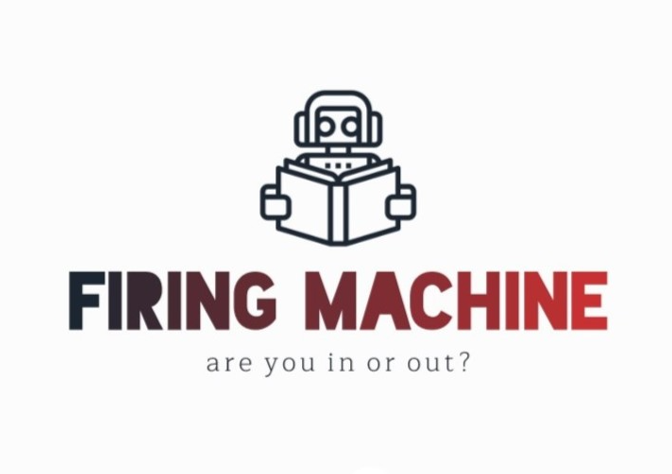

# Turnover de funcion√°rios

## Firing Machine

## Integrantes: 
- <a href="https://www.linkedin.com/in/ana-clara-zaidan/">Ana Clara Loureiro M√ºller Zaidan</a>
- Daniel Quint√£o D√°vila
- <a href="https://www.linkedin.com/in/gabriel-nascimento-b80933217/">Gabriel Metello Nascimento</a> 
- <a href="https://www.linkedin.com/in/kil-matheus-78257020a/">Kil Matheus Gomes Teixeira</a> 
- <a href="https://www.linkedin.com/in/lucas-henrique-sales-de-souza/">Lucas Henrique Sales de Souza</a>
- <a href="https://www.linkedin.com/in/mariana-silva-paula/">Mariana Silva de Paula</a> 
- <a href="https://www.linkedin.com/in/vit√≥ria-rodrigues-de-oliveira-bb955921b/">Vit√≥ria Rodrigues de Oliveira</a> 

## üìù Descri√ß√£o

<p>  O alto √≠ndice de rotatividade de funcion√°rios √© o problema cuja resolu√ß√£o nos foi alocada. Encontrar-la-emos via constru√ß√£o de algoritmo de machine learning (ML) que, ap√≥s identificar padr√µes nos dados relacionados ao contexto da sa√≠da de funcion√°rios da empresa, possibilitar√° a√ß√£o imediata sobre eles: "Propor um modelo preditivo que possibilite ter a visibilidade de tend√™ncia de risco de sa√≠da dos colaboradores e desta forma contribua para a√ß√µes de reten√ß√£o e redu√ß√£o de taxa de turnover, revisitar os demais processos de carreira e de desenvolvimento" (descri√ß√£o oficial da demanda).</p>
<p>  A solu√ß√£o proposta para o problema descrito √© a constru√ß√£o de algoritmo de machine learning que, ap√≥s identificar padr√µes nos dados relacionados ao contexto da sa√≠da de funcion√°rios da empresa, melhorar√° o poder de decis√£o dos l√≠deres da empresa. </p>

Aqui est√£o publicados:
- um resumo da an√°lise de dados;
- os c√≥digos respons√°veis pelo processamento (tratamento) dos dados da tabela;
- o modelo preditivo;

Em todos os c√≥digos, h√° coment√°rios suficientes para explicar o objetivo e funcionamento da fun√ß√£o.

# 1.0 - Importa√ß√µes e instala√ß√µes
Come√ßamos importando e instalando as bibliotecas necess√°rias para o tratamento de dados e o machine learning. Depois, importamos a pr√≥pria base de dados.

In [ ]:
# !pip install dataprep 
!pip install moment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.1 - Import das bibliotecas

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
from datetime import date
import numpy as np
from sklearn import preprocessing
import moment

Bibliotecas para os gr√°ficos

In [ ]:
## Bibliotecas para os gr√°ficos
import matplotlib.pyplot as plt #gera√ß√£o de gr√°ficos
import plotly.graph_objs as go 
import seaborn as sns #template de gr√°ficos
import plotly.express as px #gera√ß√£o de gr√°ficos din√¢micos
import plotly.offline as py

Bibliotecas dos modelos preditivos usados

In [ ]:
# Modelos preditivos:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 


M√©tricas e Ferramentas de avalia√ß√£o

In [ ]:
from sklearn import metrics
# M√©tricas:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay # matriz de confus√£o
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# Ferramentas
from sklearn.model_selection import train_test_split # separa o dataset de teste
from sklearn.model_selection import cross_val_score , KFold # valida√ß√£o cruzada
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.datasets import make_classification
from numpy import exp, array, random, dot
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import statistics


py.init_notebook_mode(connected=True) 

## 1.2 - Importando a Base de Dados
Conectando ao google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
content_link = '/content/drive/Shareddrives/G444 Drive/docs everymind/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando as planilhas pelo drive

IMPORTANTE: Conectamos a um drive espec√≠fico nosso, se houver algum erro neste ponto, tente importar o arquivo excel aqui ou conectar a alguma nuvem por aqui.

In [ ]:
# Importando as planilhas
df1 = pd.read_excel(content_link)
df2 = pd.read_excel(content_link, sheet_name = 'Reconhecimento')
df3 = pd.read_excel(content_link, sheet_name = 'Ambiente de Trabalho 27.07')

# 2.0 - An√°lise Explorat√≥ria de Dados
A an√°lise explorat√≥ria de dados √© uma abordagem para analisar conjuntos de dados e resumir suas caracter√≠sticas principais, geralmente com o apoio de m√©todos visuais. Modelos estat√≠sticos pode ser usado ou n√£o, mas principalmente, este processo √© para ver o que os dados podem nos dizer al√©m da modelagem formal ou tarefa de teste de hip√≥teses.

## 2.1 - Descri√ß√£o dos dados
Vamos ver como os dados est√£o dispostos, checando suas dimens√µes e se h√° dados faltantes.

In [ ]:
# visualizando suas dimens√µes
df1.shape

(475, 15)

In [ ]:
# visualizando a quantidade em cada linha e seu formato para cada tabela
print(' =>       Dataframe 1 - Planilha Everymind      <=  ')
df1.info()
print('---' * 20)
print('---' * 20)
print('')

print(' =>       Dataframe 2 - Planilha Reconhecimento      <=  ')
df2.info()
print('---' * 20)
print('---' * 20)
print('')

print(' =>       Dataframe 3 - Planilha Ambiente de Trabalho      <=  ')
df3.info()
print('---' * 20)
print('---' * 20)

 =>       Dataframe 1 - Planilha Everymind      <=  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Matr√≠cula      475 non-null    float64       
 1   Nome Completo  475 non-null    object        
 2   Dt Admissao    475 non-null    object        
 3   Dt Saida       191 non-null    datetime64[ns]
 4   Tipo Saida     191 non-null    object        
 5   Cargo          475 non-null    object        
 6   Salario M√™s    475 non-null    float64       
 7   Dt Nascimento  475 non-null    datetime64[ns]
 8   Genero         475 non-null    object        
 9   Etnia          475 non-null    object        
 10  Estado Civil   475 non-null    object        
 11  Escolaridade   475 non-null    object        
 12  Estado         475 non-null    object        
 13  Cidade         475 non-null    object        
 14  Area           475 

Com isso, nota-se que algumas colunas n√£o est√£o com a tipagem certa, como a 'Dt Admissao', que deveria ser dateime64[ns] (tipo data) e est√° como object (tipo texto). Logo, precisamos tratar esses dados e categorizar outros dados do tipo object, como Estado.

## 2.2 - An√°lises estat√≠sticas iniciais
Vamos dar uma olhada inicial nas principais estat√≠sticas descritivas. Uma an√°lise descritiva √© um primeiro passo importante para a realiza√ß√£o de an√°lises estat√≠sticas, pois nos d√° uma id√©ia da distribui√ß√£o dos nossos dados e ajuda-nos a detectar outliers.

In [ ]:
df1.describe()

Matr√≠cula   Salario M√™s
count  475.000000    475.000000
mean   283.223158   3333.420137
std    147.244468   2466.854924
min      2.000000    500.000000
25%    159.000000   1497.412500
50%    288.000000   2690.500000
75%    409.500000   4500.000000
max    530.000000  14282.245000

Como possu√≠mos poucos dados num√©ricos inicialmente, vamos cruzar algumas informa√ß√µes para continuar com a an√°lise descritiva:

### 2.2.1 - Rela√ß√µes de reconhecimento
Esses n√∫meros s√£o √∫teis para termos no√ß√£o das propor√ß√µes dos nossos dados e poss√≠veis rela√ß√µes entre eles.

Em ordem: 
- Pessoas que sa√≠ram
- Pessoas que n√£o sa√≠ram
- Pessoas que foram reconhecidas de alguma forma
- Pessoas que n√£o foram reconhecidas
- Pessoas que sa√≠ram e foram reconhecidas
- Pessoas que sa√≠ram e n√£o foram reconhecidas 

In [ ]:
# Pessoas que sa√≠ram: ‚úî
pessoas_desativadas = df1.dropna(subset=['Dt Saida'])['Nome Completo'].unique()
qtd_desativados = len(pessoas_desativadas)
qtd_desativados

189

In [ ]:
# Pessoas que n√£o sa√≠ram: ‚úî
pessoas_ativas = df1.query('`Dt Saida` == ""')['Nome Completo'].unique()
len(pessoas_ativas)

284

In [ ]:
# Pessoas que foram reconhecidas de alguma forma: ‚úî
pessoas_reconhecidas = df2['Codinome'].unique()
len(pessoas_reconhecidas)

173

In [ ]:
# Pessoas que n√£o foram reconhecidas: ‚úî
lista_pessoas = df1['Nome Completo'].unique()
pessoas_sem_reconhecimento = []
for i in range(0, len(lista_pessoas)):
  if lista_pessoas[i] in pessoas_reconhecidas:
    continue
  else:
    pessoas_sem_reconhecimento.append(lista_pessoas[i])
len(pessoas_sem_reconhecimento)

298

In [ ]:
# Pessoas que n√£o foram reconhecidas e sa√≠ram:
pessoas_desativadas_sem_reconhecimento = []
for pessoa in pessoas_desativadas:
  if pessoa in pessoas_reconhecidas:
    continue
  else:
    pessoas_desativadas_sem_reconhecimento.append(pessoa)
print(len(pessoas_desativadas_sem_reconhecimento))

127


In [ ]:
  # Pessoas que foram reconhecidas e sa√≠ram ‚úî
pessoas_desativadas_reconhecidas = df2.query('`Situa√ß√£o` == "Desligado"')['Codinome'].unique()
len(pessoas_desativadas_reconhecidas)

62

### 2.2.2 - G√™nero
Uma hip√≥tese inicial foi a de que o g√™nero pode impactar o modelo de alguma forma, por isso, vamos separar alguns n√∫meros importantes e, com o apoio de gr√°ficos, concluir se podemos ou n√£o validar essa hip√≥tese.

In [ ]:
gen_total = df1.groupby(['Genero']).count()
gen_total

Matr√≠cula  Nome Completo  Dt Admissao  Dt Saida  Tipo Saida  \
Genero                                                                    
Feminino          112            112          112        35          35   
Masculino         363            363          363       156         156   

            Cargo  Salario M√™s  Dt Nascimento  Etnia  Estado Civil  \
Genero                                                               
Feminino      112          112            112    112           112   
Masculino     363          363            363    363           363   

            Escolaridade   Estado  Cidade  Area  
Genero                                           
Feminino              112     112     112   112  
Masculino             363     363     363   363

In [ ]:
gen_total_masc = gen_total.iloc[0, 1]
gen_total_masc

112

In [ ]:
gen_total_fem = gen_total.iloc[1, 1]
gen_total_fem

363

In [ ]:
gen_masc_left = gen_total.iloc[0, 4]
gen_masc_left

35

In [ ]:
gen_fem_left = gen_total.iloc[1, 4]
gen_fem_left

156

In [ ]:
gen_fem_prop = (gen_fem_left/gen_total_fem)*100
gen_fem_prop

42.97520661157025

In [ ]:
gen_masc_prop = (gen_masc_left/gen_total_masc)*100
gen_masc_prop

31.25

Porcentagem de sa√≠das em g√™nero 

Text(0.5, 1.0, 'Desligamentos x G√™nero (proporcionalmente)')

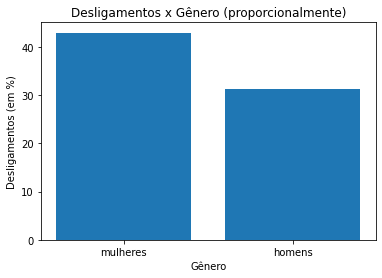

In [ ]:
gen_x = ['mulheres', 'homens']
gen_y = [gen_fem_prop, gen_masc_prop]

plt.bar(gen_x, gen_y)

plt.xlabel('G√™nero')
plt.ylabel('Desligamentos (em %)')
plt.title('Desligamentos x G√™nero (proporcionalmente)')

# 3.0 - Prepara√ß√£o dos Dados
O tratamedo de dados √© a abordagem mais importante para o modelo preditivo em vista da an√°lise de dados feita anteriormente. Aqui faremos a manuten√ß√£o dos tipos que est√£o incorretos. Al√©m disso, como o modelo preditivo em si apenas avalia dados num√©ricos, vamos transformar todas as colunas de texto em n√∫meros a partir de estrat√©gias e m√©todos explicados em cada t√≥pico.

Resumo da se√ß√£o:

- Manuten√ß√£o de types
- Categoriza√ß√£o
  - Dicion√°rio dos dados
- Deriva√ß√£o

## 3.1 - Manuten√ß√£o de types

Como visto na an√°lise explorat√≥ria de dados (t√≥pico 2), algumas vari√°veis vieram com os tipos errados ou inconsistentes. Neste t√≥pico vamos consertar esses dados e transform√°-los corretamente em vari√°veis utiliz√°veis para continuar o tratamento.

Resumo do t√≥pico:

- Eliminia√ß√£o de espa√ßos e outros obst√°culos
- Tipifica√ß√£o de dados (como datas em string para datetime)

### 3.1.1 - Elimina√ß√µes

Alguns fatores s√£o importantes serem retirados, como os espa√ßos e outros textos n√£o relevantes, como o "Pessoa Colaboradora" das features 'Codinome' (df2) e 'Pessoa Colaboradora' (df1).

#### 3.1.1.1 - Espa√ßos

Eliminamos os espa√ßos nas tabelas pois eles n√£o nos s√£o pertinentes visando o tratamento que se segue.

In [ ]:
# Aqui percorremos todas as linhas das colunas e fazer a altera√ß√£o de onde possui espa√ßo em branco e substituir para vazio 
# (percorremos apenas linhas em string, por isso o argumento 'object' e o atributo str)
for i in df1.select_dtypes(include = 'object').columns.drop('Dt Admissao'):
  df1[i] = df1[i].str.replace(' ','')

In [ ]:
for i in df2.select_dtypes(include = 'object'):
  df2[i] = df2[i].str.replace(' ','')

#### 3.1.1.2 - Pessoa Colaboradora

Eliminamos os textos "PessoaColaboradora" nas tabelas pois eles n√£o nos s√£o pertinentes visando o tratamento que se segue.

In [ ]:
# Aqui substitu√≠mos o texto de "PessoaColaboradora" de todas as linhas da coluna 'Nome Completo' por vazio 
# (isso tem como objetivo obter apenas o n√∫mero do colaborador)
for i in range(0, len(df1['Nome Completo'])):
  df1['Nome Completo'][i] = df1['Nome Completo'][i].replace('PessoaColaboradora', '')
  int(df1['Nome Completo'][i])
  
for i in range(0, len(df2['Codinome'])):
  df2['Codinome'][i] = df2['Codinome'][i].replace('PessoaColaboradora', '')
  int(df2['Codinome'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 3.1.2 - Renomea√ß√£o de coluna

A renomea√ß√£o de colunas √© importante para evitar a confus√£o quando formos tratar alguma feature a partir da matr√≠cula de um colaborador, por exemplo (j√° que est√£o escritas de forma muito semelhante, diferenciando-se apenas pelo acento). 

In [ ]:
df1 = df1.rename(columns={'Matr√≠cula': 'Matricula'})

### 3.1.3 - Datas

Como visto na an√°lise de types, algumas datas est√£o como 'object' (texto), precisamos trocar o tipo dessas features pois elas s√£o importantes para a deriva√ß√£o de outras vari√°veis futuramente.

#### 3.1.3.1 - Dados vazios

Como as pessoas ativas n√£o possuem uma 'data de sa√≠da' da empresa, vamos utilizar a data hodierna para essas pessoas possu√≠rem esse tipo de data e podermos calcular algumas coisas importantes (como a estagna√ß√£o, por exemplo).

In [ ]:
df1['Dt Saida'] = df1['Dt Saida'].replace(np.NaN, pd.to_datetime('today'))

#### 3.1.3.2 - Manuten√ß√£o dos types das datas

Agora sim podemos passar o type das datas de 'object'/'string' para 'date' no primeiro dataframe (df1)

In [ ]:
# O for percorre as linhas de 0 at√© a quantidade de linhas presente na coluna "Dt Admissao"
for i in range(0, len(df1['Dt Admissao'])):
  #Passa por cada linha das colunas selecionadas e troca a formata√ß√£o do conte√∫do que est√° l√° pelo formato indicado
  #remo√ß√£o das horas das datas e troca as / por -
  df1['Dt Admissao'][i] = str(df1['Dt Admissao'][i]).replace('00:00:00', '').replace('/', '-')
  df1['Dt Saida'][i] = str(df1['Dt Saida'][i]).replace('00:00:00', '').replace('/', '-')
  #Padroniza√ß√£o de todos os dados para o formato (ano, m√™s, dia)
  df1['Dt Admissao'][i] = moment.date(df1['Dt Admissao'][i]).format("YYYY-MM-DD")
  df1['Dt Saida'][i] = moment.date(df1['Dt Saida'][i]).format("YYYY-MM-DD")
# No fim, mudamos a tipagem das duas vari√°veis para datetime com formato apenas de data
df1['Dt Admissao'] = pd.to_datetime(df1['Dt Admissao'], format="%Y/%m/%d")
df1['Dt Saida'] = pd.to_datetime(df1['Dt Saida'], format="%Y/%m/%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying t

## 3.2 - Vari√°veis Categ√≥ricas
Aqui categorizamos as vari√°veis com valores n√£o num√©ricos para num√©rico, para viabilizar o uso dessas vari√°veis no modelo preditivo.

### 3.2.1 - Label Encoding

Em resumo, o Label Encoder √© uma excelente ferramenta para converter vari√°veis categ√≥ricas que possuem alguma rela√ß√£o de ordem, no entanto n√£o √© indicado para vari√°veis que n√£o possuem tal rela√ß√£o devido a possibilidade de introduzir problemas no modelo.

Basicamente esse m√©todo atribui cada valor √∫nico de uma coluna a um n√∫mero.

Nesse sentido, a t√©cnica de label encoding foi, inicialmente, aplicada no projeto, mas pelo contexto e pela l√≥gica, decidimos descartar os tratamentos feitos com esse m√©todo, e aplicar, ao inv√©s do label encoding, o m√©todo de "One Hot Encoding" nas vari√°veis categoricas, que ser√° melhor desenvolvido na se√ß√£o 3.2.2 deste material.

Por√©m, optamos por manter o c√≥digo dessa se√ß√£o (3.2.1) no notebook, visto que algumas das vari√°veis criadas a partir desse m√©todo est√£o sendo utilizadas no cruzamento de novas features.

In [ ]:
# Para aplicar, basta apenas aplicar o c√≥digo abaixo,
# substituindo o nome 'coluna' pela coluna que desejamos atribuir o label encoder.

#DataFrame['coluna_nova'] = preprocessing.LabelEncoder().fit_transform(DataFrame['coluna'])

#### Dicion√°rio das features num√©ricas
Este √© o dicion√°rio dos valores num√©ricos que ser√£o tratados na se√ß√£o 3.2.1, e cada t√≥pico cont√©m, respectivamente, o n√∫mero da coluna num√©rica e o seu significado (em rela√ß√£o √† coluna que derivou a num√©rica).

Na categoriza√ß√£o de dados, criamos:
- Genero Num√©rico (df1):
  - 0 = masculino
  - 1 = feminino
- Tipo Sa√≠da Num√©rico (df1):
  - 0 = ativo
  - 1 = rescis√£o de contrato por pedido de demiss√£o
  - 2 = rescis√£o de contrato por demiss√£o
  - 3 = demiss√£o
  - 4 = pedido de demiss√£o
- Regi√µes (df1):
  - 1 = regi√£o Norte
  - 2 = regi√£o Nordeste
  - 3 = regi√£o Centro-Oeste
  - 4 = regi√£o Sudeste
  - 5 = regi√£o Sul
- Situa√ß√£o (df2):
  - 0 = desativo
  - 1 = ativo ou afastado
- Status (df1):
  - 0 = desativo
  - 1 = ativo 
- Sal√°rio Comparado (df1):
  - 0 = o sal√°rio do colaborador est√° igual ou maior √† m√©dia salarial do seu cargo
  - 1 = o sal√°rio da colaborador √© menor do que a m√©dia salarial do seu cargo
- Faixa et√°ria (df1):
  - 0 = entre 18 e 21
  - 1 = entre 22 e 25
  - 2 = entre 26 e 29
  - 3 = entre 30 e 33
  - 4 = entre 34 e 37
  - 5 = entre 38 e 41
  - 6 = entre 42 e 45
  - 7 = entre 46 e 49
  - 8 = entre 50 e 65
- Estado SP (df1): 
  - 0 = mora fora de SP
  - 1 = mora em SP
- Estado Civil (df1):
  - 0 = solteiros, divorciados e separados
  - 1 = casados e uni√£o est√°vel
- Area_num (df1):
  - 0 = AMS
  - 1 = AgenciaDigital
  - 2 = Analytics
  - 3 = BAC
  - 4 = BPM
  - 5 = BestMinds
  - 6 =  CPG&Retail
  - 7 = CPG&RetailI
  - 8 = CPG&RetailII
  - 9 = Commerce
  - 10 = Core&Industrias
  - 11 = Core&IndustriasI
  - 12 = Core&IndustriasII
  - 13 = Diretoria
  - 14 = Education
  - 15 = Financeiro
  - 16 = Infraestrutura
  - 17 = Integration
  - 18 = MktCloud
  - 19 = PS
  - 20 = People
  - 21 = Produtos
  - 22 = Vendas
- Cidades (df1)
    - 112 = S√£oPaulo
    - 74 = Osasco
    - 107 = S√£oBernardodoCampo
    - 45 = Guarulhos
    - 101 = SantoAndr√©
    - 105 = Sorocaba
    - 68 = MogidasCruzes
    - 61 = Londrina
    - 85 = PraiaGrande
    - 62 = Mafra
    - 7 = Barueri
    - 9 = BeloHorizonte
    - 89 = Recife
    - 66 = Mau√°
    - 30 = Curitiba
    - 21 = Carapicu√≠ba
    - 55 = Itaquaquecetuba
    - 94 = RiodeJaneiro
    - 38 = Fortaleza                
    - 31 = Diadema                  
    - 29 = Cotia                    
    - 102 = Santos                  
    - 59 = Jundia√≠                  
    - 116 = Uberl√¢ndia              
    - 114 = Tabo√£odaSerra           
    - 12 = Bras√≠lia                 
    - 106 = Suzano                  
    - 100 = SantanadeParna√≠ba       
    - 80 = Pelotas                  
    - 57 = Jo√£oPessoa               
    - 113 = S√£oVicente              
    - 46 = Hortol√¢ndia              
    - 96 = Salvador                 
    - 10 = Bel√©m                    
    - 37 = Florian√≥polis            
    - 86 = PresidentePrudente       
    - 77 = Paulista                 
    - 78 = Paul√≠nia                 
    - 70 = Niter√≥i                  
    - 26 = Conc√≥rdia               
    - 4 = Atibaia                  
    - 60 = Limeira                 
    - 1 = Alfenas                  
    - 84 = Po√°                      
    - 108 = S√£oCaetanodoSul          
    - 17 = Campinas                 
    - 53 = ItapecericadaSerra       
    - 54 = Itapevi                  
    - 16 = Camaragibe               
    - 15 = Caieiras                 
    - 93 = RioNegro                 
    - 39 = Franca                   
    - 32 = Divin√≥polis              
    - 90 = Ribeir√£oPires            
    - 82 = Piracicaba               
    - 76 = Patos                    
    - 97 = SantaB√°rbaraD'Oeste      
    - 75 = Palmital                 
    - 110 = S√£oJos√©                 
    - 79 = PedroLeopoldo       
    - 117 = Una√≠                  
    - 103 = Sert√£ozinho           
    - 81 = Pindamonhangaba        
    - 115 = Taubat√©               
    - 83 = PortoAlegre            
    - 104 = Sobral                
    - 95 = Salgado                
    - 111 = S√£oLouren√ßo            
    - 92 = RioGrande              
    - 109 = S√£oCrist√≥v√£o           
    - 98 = SantaMariadaVit√≥ria    
    - 91 = Ribeir√£oPreto          
    - 87 = Promiss√£o              
    - 88 = RafaelFernandes        
    - 99 = SantaMariadoPar√°      
    - 0 = Abaetetuba             
    - 73 = NovoHamburgo           
    - 19 = CampoLimpoPaulista     
    - 33 = DoisVizinhos           
    - 28 = Contagem               
    - 27 = Congonhas             
    - 25 =Colombo                
    - 24 = Charqueadas            
    - 23 = Caucaia                
    - 22 = Catanduvas             
    - 20 = Canoas                 
    - 18 = CampoGrande            
    - 35 = Erechim                
    - 14 = Cabre√∫va               
    - 13 = Cabedelo               
    - 11 = Bragan√ßaPaulista      
    - 8 = BelaVistadeGoi√°s       
    - 6 = Balne√°rioCambori√∫      
    - 5 = Bacabal                
    - 3 = An√°polis               
    - 2 = Ananindeua             
    - 34 = Embu-Gua√ßu             
    - 36 = Eus√©bio                
    - 72 = NovaLima               
    - 52 = Itanha√©m               
    - 71 = NovaIgua√ßu             
    - 69 = Navegantes             
    - 67 = MogiMirim              
    - 65 = Maring√°                
    - 64 = Maric√°                 
    - 63 = Mairipor√£              
    - 58 = JuazeirodoNorte        
    - 56 = Jandira                
    - 51 = Itai√≥polis             
    - 40 = FranciscoBeltr√£o       
    - 50 = Ipanema                
    - 49 = Indaiatuba             
    - 48 = Igarassu               
    - 47 = Igarap√©                
    - 44 = Guai√ßara               
    - 43 = Guaimb√™                
    - 42 = Garanhuns              
    - 41 = FranciscoMorato        
    - 118 = Vinhedo                   

#### 3.2.1.1 - G√™nero
Cria√ß√£o da vari√°vel 'Genero_Numerico', a partir da coluna 'Genero', na df1

In [ ]:
# Categoriza√ß√£o do g√™nero dos funcion√°rios
# 0 significa Masculino
# 1 significa Feminino
df1['Genero_Numerico'] = (df1['Genero']
                          .replace('Masculino', 0)
                          .replace('Feminino', 1))

#### 3.2.1.2 - Tipo Saida
Tipo de sa√≠da da empresa por ordem de relev√¢ncia (em que o pedido de demiss√£o √© mais importante) - na df1

In [ ]:

# Categoriza√ß√£o do tipo de sa√≠da dos funcion√°rios
# 0 significa ativo
# 1 significa resciz√£o de contrato por pedido de demiss√£o
# 2 significa rescis√£o de contrato por demiss√£o
# 3 significa demiss√£o
# 4 significa pedido de demiss√£o
df1['Tipo_Saida_Numerico'] = (df1['Tipo Saida']
                              .fillna(0)
                              .replace('RescisaoContratoExp-Dispensa', 1)
                              .replace('RescisaoContratoExp-Pedido', 2)
                              .replace('DispensasemJustaCausa', 3)
                              .replace('PedidodeDemiss√£o', 4))

#### 3.2.1.3 - Estado e Regi√£o
Cria√ß√£o das vari√°veis 'Estado_numerico' e 'Regiao_Numerico', ambas a partir da vari√°vel 'Estado', na df1

Cria√ß√£o do 'Estado_Numerico':

In [ ]:
# Categoriza√ß√£o dos Estados para futuros cruzamentos de dados
df1['Estado_Numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Estado'])

Cria√ß√£o do 'Regiao':

In [ ]:
df1['Regiao'] = (df1['Estado']
                       # Norte
                       .replace('AM', 'norte')
                       .replace('RR', 'norte')
                       .replace('AC', 'norte')
                       .replace('RO', 'norte')
                       .replace('AP', 'norte')
                       .replace('PA', 'norte')
                       .replace('TO', 'norte')
                       # Nordeste
                       .replace('MA', 'nordeste')
                       .replace('CE', 'nordeste')
                       .replace('PI', 'nordeste')
                       .replace('RN', 'nordeste')
                       .replace('PB', 'nordeste')
                       .replace('PE', 'nordeste')
                       .replace('AL', 'nordeste')
                       .replace('SE', 'nordeste')
                       .replace('BA', 'nordeste')
                       # Centro
                       .replace('MS', 'centro')
                       .replace('GO', 'centro')
                       .replace('DF', 'centro')
                       .replace('MT', 'centro')
                       # Sudeste
                       .replace('MG', 'sudeste')
                       .replace('ES', 'sudeste')
                       .replace('RJ', 'sudeste')
                       .replace('SP', 'sudeste')
                       # Sul
                       .replace('PR', 'sul')
                       .replace('SC', 'sul')
                       .replace('RS', 'sul')
                       )

Cria√ß√£o do 'Regiao_Numerico':

In [ ]:
# Categoriza√ß√£o das Regi√µes (agrupando os Estados)
# '1' para Norte
# '2' para Nordeste
# '3' para Centro-Oeste
# '4' para Sudeste
# '5' para Sul
df1['Regiao_Numerico'] = (df1['Estado']
                       # Norte
                       .replace('norte', 1)
                       # Nordeste
                       .replace('nordeste', 2)
                       # Centro
                       .replace('centro', 3)
                       # Sudeste
                       .replace('sudeste', 4)
                       # Sul
                       .replace('sul', 5)
                       )

#### 3.2.1.4 - Cargo
Cria√ß√£o da vari√°vel 'Cargo_Numerico', a partir da coluna 'Cargo', na df1

In [ ]:
# Categoriza√ß√£o dos Cargos para futuros cruzamentos de dados
df1['Cargo_Numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Cargo'])

####3.2.1.5 - √Årea
Antes de aplicar o Label Enconding na 'Area' dos colaboradores, na df1, precisamos atualizar as Areas dos colaborados em rela√ß√£o √† 'Area' da df3.

##### 3.2.1.5.1 - Agrupamento de √°reas da df1
Como visto na an√°lise de dados, as √Åreas da df3 - tabela de Ambiente de Trabalho da Everymind- n√£o est√£o iguais √†s da df1, por isso, vamos agrupar as √°reas da df1, para coincidir com as da df3.

In [ ]:
#transfroma√ß√£o das √°reas, da tabela 1 para a tabela 3
#Agrupa as √°reas pelas √°reas que correspondem na tabela 3 e cria uma coluna com elas na tabela 1 
df1['Area_Agrupada'] = (df1['Area']
                              .replace('Core&IndustriasI', "Core&Industrias")
                              .replace('Core&IndustriasII', "Core&Industrias")
                              .replace('CPG&RetailII ', "CPG&Retail")
                              .replace('CPG&RetailI', "CPG&Retail")
                              .replace('AMS', "AMS&PS")
                              .replace('PS ', "AMS&PS")
                              .replace('Analytics', "Analytics&Integration")
                              .replace('Integration', "Analytics&Integration")
                              .replace('MktCloud', "MktCloud")
                              .replace('AgenciaDigital', "MktCloud")
                              .replace('Commerce', "Commerce")
                              .replace('Vendas', "Vendas" )
                              .replace('Produtos', "Everymind")
                              .replace('People', "People&Culture")
                              .replace('BAC', "Everymind")
                              .replace('Education', "Everymind")
                              .replace('BestMinds', "Everymind")
                              .replace('Diretoria', "Everymind")
                              .replace('BPM', "Everymind")
                              .replace('Infraestrutura', "Everymind")
                              .replace('Financeiro', "Everymind"))

##### 3.2.1.5.2 - Agrupamento de √°reas na df3

In [ ]:
df3['Divisao_agrupada'] = (df3['Divisao'].replace('Core & Industrias I', 'Core&Industrias')
                                         .replace('Core & Industrias II', 'Core&Industrias')
                                         .replace('CPG & Retail II', 'CPG&Retail')
                                         .replace('CPG & Retail I', 'CPG&Retail')
                                         .replace('Analytics & Integration', 'Analytics&Integration')
                                         .replace('People & Culture', 'People&Culture')
                                         .replace('Mkt Cloud', 'MktCloud'))

##### 3.2.1.5.3 - Label encoding na Area da df1

In [ ]:
df1['Area_numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Area_Agrupada'])

####3.2.1.6 - Cidade
Cria√ß√£o da vari√°vel 'Cidade_numerico', a partir da coluna 'Cidade', na df1

In [ ]:
df1['Cidade_numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Cidade'])

####3.2.1.7 - Estado Civil
Cria√ß√£o da vari√°vel 'ECivil_numerico', a partir da coluna 'Estado Civil', na df1. √â importante apontar que decidimos por agrupar os valores 'Uni√£oEst√°vel', 'Divorciado' e 'Separado' ao valor 'Casado', visto que esses 3 primeiros valores t√™m uma frequ√™ncia muito insignificante.

Nesse sentido, esse crit√©rio de agrupamento parte da hip√≥tese de que pessoas com pessoas dependentes financeiramente a elas (esposos ou filhos), tendem a querer maior estabilidade no emprego, tendo menor tendencia a sair. Com isso, acreditamos que pessoas nas situa√ß√µes citadas a cima tem mais chance de terem filhos, por exemplo.


In [ ]:
df1['Estado Civil'].value_counts()

Solteiro        342
Casado          114
Divorciado       14
Uni√£oEst√°vel      3
Separado          2
Name: Estado Civil, dtype: int64

In [ ]:
df1['ECivil_Agrupado'] = (df1['Estado Civil']
                      .replace('Uni√£oEst√°vel', 'Casado')
                      .replace('Divorciado', 'Casado')
                      .replace('Separado', 'Casado'))

In [ ]:
# Categoriza√ß√£o do estado civil (EC)
# '0' para Solteiros
# '1' para Casados
df1['ECivil_Numerico'] = (df1['ECivil_Agrupado']
                      .replace('Casado', 1)
                      .replace('Solteiro', 0))

In [ ]:
df1['ECivil_Numerico'].value_counts()

0    342
1    133
Name: ECivil_Numerico, dtype: int64

####3.2.1.8 - Situa√ß√£o
Categoriza√ß√£o da coluna 'Situa√ß√£o' dos colaboradores, na df2

In [ ]:
# Categoriza√ß√£o da situa√ß√£o dos funcion√°rios
# 0 significa que o funcion√°rio foi desligado
# 1 significa que o funcion√°rio est√° ativo
df2['Situa√ß√£o_Numerico'] = (df2['Situa√ß√£o']
                          .replace('Desligado', 0)
                          .replace('Ativo', 1)
                          .replace('Afastado',1))

#### 3.2.1.9 - LabelEncoder geral no df2
No segundo dataframe (df2), aplicamos o label encoder nas vari√°veis que ser√£o utilizadas no modelo:

In [ ]:
#Substituindo os valores das colunas da tabela 2 por valores num√©ricos
for column in df2.drop(['Data de Admiss√£o',	'Data Vig√™ncia', 'Novo Salario', 'Codinome', 'Matricula', 'Situa√ß√£o', 'Situa√ß√£o_Numerico'], axis=1):
  df2[f'{column}_Numerico'] = preprocessing.LabelEncoder().fit_transform(df2[column])

In [ ]:
df2.columns

Index(['Matricula', 'Codinome', 'Situa√ß√£o', 'Data de Admiss√£o',
       'Data Vig√™ncia', 'Novo Cargo', 'Novo Salario', 'Motivo',
       'Alterou Fun√ß√£o', 'Situa√ß√£o_Numerico', 'Novo Cargo_Numerico',
       'Motivo_Numerico', 'Alterou Fun√ß√£o_Numerico'],
      dtype='object')

### 3.2.2 - One Hot Encoding

Ao aplicar em novos dados, o m√©todo OneHotEncoder() ir√° construir todas as colunas que foram geradas no treinamento atribuindo valor 0 ou 1, dependendo da presen√ßa ou aus√™ncia da caracter√≠stica, respectivamente. Nesse sentido, esse m√©todo √© ideal para utilizar em modelos de machine learning.

In [ ]:
# Para aplicar, basta apenas aplicar o c√≥digo abaixo,
# substituindo o nome 'coluna' pela coluna que ser√° alvo do one hot encoder.


**Converte** a vari√°vel categ√≥rica em vari√°veis ‚Äã‚Äãfict√≠cias/indicadoras, ou seja, em outras features onde retorna 0 quando a linha for falsa, e 1 quando ela for verdade.

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario M√™s', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico'],
      dtype='object')

In [ ]:
# Essas linhas criam v√°rios DataFrames que ir√£o guardar dados. Ele vai gerar
# um √∫nica coluna que vai retornar todas as
# informa√ß√£o('Cargo', 'Area', 'Estado' ou 'ECivil_Numerico')
# que pertencem de todos os funcion√°rios.

dado_cargos = pd.DataFrame(df1, columns=["Cargo"])
dado_area = pd.DataFrame(df1, columns=["Area_Agrupada"])
dado_estado = pd.DataFrame(df1, columns=["Estado"])
dado_ecivil = pd.DataFrame(df1, columns=["ECivil_Agrupado"])
dado_gen = pd.DataFrame(df1, columns=['Genero'])
dado_city = pd.DataFrame(df1, columns=['Cidade'])
dado_regiao = pd.DataFrame(df1, columns=['Regiao'])
dado_escola = pd.DataFrame(df1, columns=['Escolaridade'])

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario M√™s', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico'],
      dtype='object')

In [ ]:
# Quando utilizamos o Dummies, ele vai tranformar um dado de uma c√©lula em uma coluna,
# e verifica se aquele antigo dado que pertencia naquela linha √© verdadeiro. 
# Se sim, ele retorna 1 sen√£o 0.

dummie_cargos = pd.get_dummies(dado_cargos["Cargo"])
dummie_area = pd.get_dummies(dado_area["Area_Agrupada"])
dummie_estado = pd.get_dummies(dado_estado["Estado"])
dummie_ecivil = pd.get_dummies(dado_ecivil["ECivil_Agrupado"])
dummie_genero = pd.get_dummies(dado_gen['Genero'])
dummie_city = pd.get_dummies(dado_city['Cidade'])
dummie_regiao = pd.get_dummies(dado_regiao['Regiao'])
dummie_escola = pd.get_dummies(dado_escola['Escolaridade'])

####3.2.2.1 - Cria√ß√£o do dataframe 'cat_df'
Esse dataframe cont√©m todas as features categ√≥ricas que utilizaremos, com one hot encoding aplicado.

In [ ]:
# Ap√≥s o tratamento dos dados, n√≥s juntamos todas os Dummies tratados acima,
# junto com as features que retornam o melhor desempenho nos modelos ap√≥s
# testes de vari√°veis e aux√≠lio da matriz de correla√ß√£o.
cat_df = pd.DataFrame()
cat_df = pd.concat([cat_df, dummie_cargos], axis = 1)
cat_df = pd.concat([cat_df, dummie_area], axis = 1)
cat_df = pd.concat([cat_df, dummie_estado], axis = 1)
cat_df = pd.concat([cat_df, dummie_ecivil], axis = 1)
cat_df = pd.concat([cat_df, dummie_genero] , axis = 1)
# cat_df = pd.concat([cat_df, dummie_city] , axis = 1)
cat_df = pd.concat([cat_df, dummie_regiao], axis = 1)
cat_df = pd.concat([cat_df, dummie_escola], axis = 1)

In [ ]:
cat_df.columns

Index(['Arquiteto', 'ArquitetoSr', 'AssistenteI', 'AssistenteII',
       'AuxiliardeLimpeza', 'ComercialIS', 'ComercialPl', 'Consultor',
       'DevEspecialista', 'DevJr', 'DevPl', 'DevSr', 'Diretor', 'Educa√ß√£oPl',
       'Estagiaria', 'FinanceiroJr', 'FuncionalEspecialista', 'FuncionalJr',
       'FuncionalPl', 'FuncionalSr', 'Gerente', 'GerenteCSSr', 'GerentePV',
       'GerenteSr', 'GerenteVendasI', 'GerenteVendasII', 'GerenteVendasIII',
       'InfraestruturaJr', 'MarketingPL', 'PessoasPl', 'ScrumMasterJr',
       'TesteJr', 'TesteSr', 'Trainee-Dev', 'Trainee-Funcional',
       'VicePresidente', 'AMS&PS', 'Analytics&Integration', 'CPG&Retail',
       'CPG&RetailII', 'Commerce', 'Core&Industrias', 'Everymind', 'MktCloud',
       'PS', 'People&Culture', 'Vendas', 'BA', 'CE', 'DF', 'GO', 'MA', 'MG',
       'MS', 'PA', 'PB', 'PE', 'PR', 'RJ', 'RN', 'RS', 'SC', 'SE', 'SP',
       'Casado', 'Solteiro', 'Feminino', 'Masculino', 'centro', 'nordeste',
       'norte', 'sudeste', 'sul'],
  

In [ ]:
cat_df.head(5)

Arquiteto  ArquitetoSr  AssistenteI  AssistenteII  AuxiliardeLimpeza  \
0          0            0            0             0                  0   
1          0            0            0             0                  0   
2          0            0            0             0                  0   
3          0            1            0             0                  0   
4          0            0            0             0                  0   

   ComercialIS  ComercialPl  Consultor  DevEspecialista  DevJr  ...  SP  \
0            0            0          0                0      0  ...   1   
1            0            0          0                1      0  ...   1   
2            0            0          0                0      0  ...   1   
3            0            0          0                0      0  ...   1   
4            0            0          0                0      0  ...   1   

   Casado  Solteiro  Feminino  Masculino  centro  nordeste  norte  sudeste  \
0       1         0         1          0       0         0      0        1   
1       0         1         0          1       0         0      0        1   
2       0         1         0          1       0         0      0        1   
3       0         1         0          1       0         0      0        1   
4       0         1         0          1       0         0      0        1   

   sul  
0    0  
1    0  
2    0  
3    0  
4    0  

[5 rows x 73 columns]

## 3.3 - Deriva√ß√£o
Aqui criamos algumas vari√°veis a partir do cruzamento de vari√°veis j√° existentes, levando em conta hip√≥teses levantadas na an√°lise explorat√≥ria de dados.

### 3.3.1 - Status
Este ser√° o nosso "target" do modelo preditivo. Relacionada ao dataframe principal (df1), 'Status' reflete justamente se o colaborador est√° na empresa ou n√£o, sendo 0 que ele n√£o est√° e 1 quando ele ainda est√° ativo.

-> Essa feature foi criada a partir da coluna 'Tipo Saida' da df1

In [ ]:
# Cria√ß√£o da coluna status, onde 
# "0" √© "desativo" 
# "1" √© "ativo"
df1['Status'] = (df1['Tipo Saida']
                              .fillna(1)
                              .replace('RescisaoContratoExp-Dispensa', 0)
                              .replace('RescisaoContratoExp-Pedido', 0)
                              .replace('DispensasemJustaCausa', 0)
                              .replace('PedidodeDemiss√£o', 0))

### 3.3.2 - M√©dia Salarial e Sal√°rio Comparado
'Media_Salarial': feature que diz qual a m√©dia salarial do cargo daquele colaborador na empresa; 
-> criada a partir do calculo da m√©dia dos salarios da coluna 'Salario M√™s' para cada cargo da df1.

'Salario_Comparado': feature que retorna se o valor do 'Salario M√™s' do colaborador est√° a cima ou abaixo do valor da 'Media_Salarial' referente ao seu cargo.
-> criada tamb√©m na df1 

Quando o indiv√≠duo possui um sal√°rio menor do que a m√©dia, o sal√°rio comparado recebe '1', quando est√° acima ou igual √† m√©dia, o sal√°rio comparado recebe '0'.

In [ ]:
df1['Media_Salarial'] = -1

for i in range(0, len(df1)):
  Cargo_da_pessoa = df1['Cargo_Numerico'][i]
  df1['Media_Salarial'][i] = df1.query(f'`Cargo_Numerico` == {Cargo_da_pessoa}').mean()['Salario M√™s']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1['Salario_Comparado'] = 0

for item in range(0,len(df1)):
    if df1['Media_Salarial'][item] > df1['Salario M√™s'][item]:
        df1['Salario_Comparado'][item] = 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A variavel categorica 'Salario_Comparado', da df1,  n√£o precisa de one hot encoding, mas deve ser adicionada ao dataframe 'cat_df'

In [ ]:
dado_salcomp = pd.DataFrame(df1, columns=['Salario_Comparado']) 

In [ ]:
dado_salcomp

Salario_Comparado
0                    0
1                    1
2                    0
3                    0
4                    0
..                 ...
470                  1
471                  1
472                  1
473                  1
474                  0

[475 rows x 1 columns]

In [ ]:
cat_df = pd.concat([cat_df, dado_salcomp], axis = 1)

In [ ]:
cat_df.head(3)

Arquiteto  ArquitetoSr  AssistenteI  AssistenteII  AuxiliardeLimpeza  \
0          0            0            0             0                  0   
1          0            0            0             0                  0   
2          0            0            0             0                  0   

   ComercialIS  ComercialPl  Consultor  DevEspecialista  DevJr  ...  Casado  \
0            0            0          0                0      0  ...       1   
1            0            0          0                1      0  ...       0   
2            0            0          0                0      0  ...       0   

   Solteiro  Feminino  Masculino  centro  nordeste  norte  sudeste  sul  \
0         0         1          0       0         0      0        1    0   
1         1         0          1       0         0      0        1    0   
2         1         0          1       0         0      0        1    0   

   Salario_Comparado  
0                  0  
1                  1  
2                  0  

[3 rows x 74 columns]

### 3.3.3 - Tempo de trabalho
Essa feature mede quanto tempo o colaborador desativado ficou na empresa e h√° quanto tempo os colaboradores est√£o ativos. Dessa forma, esse c√°lculo √© feito a partir da subtra√ß√£o entre o valor da 'Dt Saida' e a 'Dt Admissao', ou entre o dia de hoje e a 'Dt Admissao', respectivamente.

-> Esta feature est√° situada na df1

In [ ]:
#Fun√ß√£o pega a data de admiss√£o do colaborador e a data do seu desligamento, e encontra o per√≠do entre elas.
df1['Tempo_de_Trabalho'] = ((df1['Dt Saida'] - df1['Dt Admissao'])/ np.timedelta64(1, 'D')).astype(int)

### 3.3.4 - Idade
A vari√°vel idade foi criada a partir da coluna 'Dt Nascimento', atrav√©s do calculo de subtra√ß√£o entre a data de hoje e a data de nascimento, na df1.

In [ ]:
#Ele pega a data de hoje e subtrai da data de nascimento, retornando a idade, np.timedelta64, transforma o retorno da data de dias para ano.
df1['Idade'] = ((pd.to_datetime('today')-pd.to_datetime(df1['Dt Nascimento']))/ np.timedelta64(1, 'Y')).astype(int)

### 3.3.5 - Faixa Et√°ria
A Faixa Et√°ria foi criada a partir da vari√°vel 'Idade' e √© um pouco mais categorizada, pois agrupa as idades de 4 em 4 anos.

-> Essa coluna foi criada na df1

In [ ]:
df1['Faixa_Etaria'] = 0
for i in range(0, len(df1)):
    if df1['Idade'][i] >= 18 and  df1['Idade'][i] <= 21:
        df1['Faixa_Etaria'][i] = 0
    elif df1['Idade'][i] >= 22 and  df1['Idade'][i] <= 25:
        df1['Faixa_Etaria'][i] = 1
    elif df1['Idade'][i] >= 26 and  df1['Idade'][i] <= 29:
        df1['Faixa_Etaria'][i] = 2
    elif df1['Idade'][i] >= 30 and  df1['Idade'][i] <= 33:
        df1['Faixa_Etaria'][i] = 3
    elif df1['Idade'][i] >= 34 and  df1['Idade'][i] <= 37:
        df1['Faixa_Etaria'][i] = 4
    elif df1['Idade'][i] >= 38 and  df1['Idade'][i] <= 41:
        df1['Faixa_Etaria'][i] = 5
    elif df1['Idade'][i] >= 42 and  df1['Idade'][i] <= 45:
        df1['Faixa_Etaria'][i] = 6
    elif df1['Idade'][i] >= 46 and  df1['Idade'][i] <= 49:
        df1['Faixa_Etaria'][i] = 7
    elif df1['Idade'][i] >= 50 and  df1['Idade'][i] <= 65:
        df1['Faixa_Etaria'][i] = 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is tryi

### 3.3.6 - Per√≠odo de estagna√ß√£o de reconhecimento
O per√≠odo de estagna√ß√£o √© o tempo, em dias, entre o ultimo reconhecimento recebido por um colaborador (m√©rito ou promo√ß√£o), e o dia de hoje (se ele for ativo), ou a data de demiss√£o (se ele estiver desativo). Ou seja, representa ha quanto tempo a pessoa est√° sem receber um reconhecimento.

####3.3.6.1 - Integra√ß√£o da 'Dt Saida' na df2

Primeiro, colocamos a 'Dt Saida' da df1 na df2, para tornar possivel o calculo da estagna√ß√£o de quem ja saiu da empresa.

In [ ]:
#colocamos esse valor inicial apenas para definir a tipagem da variavel como datetime
df2['Dt Saida'] = pd.to_datetime('today')

contador = 0
for matricula in df2['Matricula']:
    if matricula in df1['Matricula'].values:
        cont = 0
        for mat in df1['Matricula']:
            if mat == matricula:
                df2['Dt Saida'][contador] = df1['Dt Saida'][cont]
            cont+=1
    contador+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



####3.3.6.2 - Estagna√ß√£o na df2

Agora, criaremos a vari√°vel 'Estagna√ß√£o' na df2,  

In [ ]:
df2['Estagna√ß√£o'] = 0
contador = 0
for i in df2['Situa√ß√£o_Numerico']:
    
    vigencia = (pd.to_datetime(df2['Data Vig√™ncia'][contador]))
    #hoje = ((pd.to_datetime('today'))/ np.timedelta64(1, 'D')).astype(int)
    hoje = (pd.to_datetime('today'))

    if df2['Situa√ß√£o_Numerico'][contador] == 1:
        df2['Estagna√ß√£o'][contador] = ((hoje- vigencia)/ np.timedelta64(1, 'D'))
    else:
        saida = df2['Dt Saida'][contador]
        
        df2['Estagna√ß√£o'][contador] = ((saida-vigencia)/ np.timedelta64(1, 'D'))
    contador+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2.head(3)

Matricula Codinome Situa√ß√£o Data de Admiss√£o Data Vig√™ncia   Novo Cargo  \
0      373.0       10    Ativo       2022-02-14    2022-07-01  FuncionalJr   
1      110.0      101    Ativo       2019-12-02    2021-06-01        DevJr   
2      110.0      101    Ativo       2019-12-02    2022-02-01  FuncionalSr   

   Novo Salario    Motivo Alterou Fun√ß√£o  Situa√ß√£o_Numerico  \
0        1600.0  PROMO√á√ÉO            Sim                  1   
1        2600.0    M√âRITO            N√£o                  1   
2        4957.2  PROMO√á√ÉO            Sim                  1   

   Novo Cargo_Numerico  Motivo_Numerico  Alterou Fun√ß√£o_Numerico   Dt Saida  \
0                   13                1                        1 2022-10-07   
1                    7                0                        0 2022-10-07   
2                   15                1                        1 2022-10-07   

   Estagna√ß√£o  
0          98  
1         493  
2         248

#### 3.3.6.3 - Integra√ß√£o estagna√ß√£o no df1

Este c√≥digo integra a estagna√ß√£o criada na df2 ao dataframe principal (df1).

In [ ]:
# def get_estagnacao(x): #define a funcao
#   df_funcionario = df2[df2['Matricula']==x['Matricula']] #cria um dataframe com apenas os dados que est√£o nas duas tabelas ao mesmo tempo
#   return df_funcionario['Estagna√ß√£o'].min() #devolve, desse dataframe, apenas o menor valor de estagna√ß√£o
# df1['Estagna√ß√£o'] = df1.apply(get_estagnacao, axis=1)

In [ ]:
df1['Estagna√ß√£o'] = 0

contador = 0
for matricula in df1['Matricula']:
  if matricula in df2['Matricula'].values:
    query = df2.query(f'Matricula == {matricula}')
    if query['Matricula'].count() > 1:
      df1['Estagna√ß√£o'][contador] = np.array(query['Estagna√ß√£o']).min()
    else:
      df1['Estagna√ß√£o'][contador] = query['Estagna√ß√£o']
  else:
    if df1.query(f'Matricula == {matricula}')['Status'][contador] == 0:
      df1['Estagna√ß√£o'][contador] = round(((pd.to_datetime(df1['Dt Saida'][contador])-pd.to_datetime(df1['Dt Admissao'][contador]))/np.timedelta64(1, 'D')))
    else:
      df1['Estagna√ß√£o'][contador] = round(((pd.to_datetime('today')-pd.to_datetime(df1['Dt Admissao'][contador]))/np.timedelta64(1, 'D')))

  contador += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is tryin

In [ ]:
df1.head(3)

Matricula Nome Completo Dt Admissao   Dt Saida        Tipo Saida  \
0      290.0           275  2006-02-01 2022-10-07               NaN   
1       20.0           287  2009-04-01 2021-10-29  PedidodeDemiss√£o   
2        2.0           247  2015-02-02 2022-10-07               NaN   

             Cargo  Salario M√™s Dt Nascimento     Genero   Etnia  ...  \
0          Gerente     7558.215    1980-03-10   Feminino   Preta  ...   
1  DevEspecialista     4406.965    1981-06-16  Masculino  Branca  ...   
2        GerenteSr     9914.400    1992-01-25  Masculino  Branca  ...   

  Cidade_numerico ECivil_Agrupado ECivil_Numerico Status Media_Salarial  \
0             112          Casado               1      1           6605   
1             102        Solteiro               0      0           5604   
2             112        Solteiro               0      1           8586   

   Salario_Comparado  Tempo_de_Trabalho  Idade Faixa_Etaria Estagna√ß√£o  
0                  0               6092     42            6        463  
1                  1               4594     41            5        332  
2                  0               2804     30            3        340  

[3 rows x 33 columns]

### 3.3.7 - Quantidade de Reconhecimento

A vari√°vel 'Reconhecimento_Numerico' reflete quantas vezes cada colaborador recebeu algum tipo de reconhecimento (m√©rito ou promo√ß√£o). 

Essa vari√°vel foi criada, inicialmente, na df2, e, depois, integrada na df1.

Cria√ß√£o da coluna - o calculo se baseia na quantidade de vezes que o mesmo colaborador aparece na df2

In [ ]:
df2['Reconhecimento_Numerico'] = df2['Codinome'].replace(df2['Codinome'].value_counts())

Integra√ß√£o ao dataframe principal (df1)

In [ ]:
def get_reconhecimento(x): #define a funcao
  df_funcionario = df2[df2['Matricula']==x['Matricula']] #cria um dataframe com apenas os dados que est√£o nas duas tabelas ao mesmo tempo
  return df_funcionario['Reconhecimento_Numerico'].min() #devolve, desse dataframe, um dos valores
df1['Reconhecimento_Numerico'] = df1.apply(get_reconhecimento, axis=1).fillna(0)

### 3.3.8 - M√©dia de Reconhecimento por Tempo
A variavel "Reconhecimento_Medio" foi criada na df1, e representa a quantidade de reconhecimento do colaborador, mas de forma proporcional ao tempo de trabalho da pessoa na empresa.

In [ ]:
df1['Reconhecimento_Medio'] = 0
contador = 0
for pessoa in df1['Reconhecimento_Medio']:
  if df1['Reconhecimento_Numerico'][contador] != 0:
    df1['Reconhecimento_Medio'][contador] = (df1['Tempo_de_Trabalho'][contador])/(df1['Reconhecimento_Numerico'][contador])
  contador += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###3.3.9 - Integra√ß√£o dos feedbacks da df3 na df1
Teremos algumas etapas de tratamento da df3, para viabilizar a cria√ß√£o da coluna 'Feedback' na df1, que representa a m√©dia das pontua√ß√µes da coluna 'Pontua√ß√£o' para cada 'Area_Agrupada' da df1.

####3.3.9.1 - Area Agrupada
Aqui, transformamos as √°reas da df1 de acordo com as areas da df3, atrav√©s do agrupamento das areas especificas que da coluna inicial 'Area'.

In [ ]:
df1['Area_Agrupada'] = (df1['Area']
                              .replace('Core&IndustriasI', "Core&Industrias")
                              .replace('Core&IndustriasII', "Core&Industrias")
                              .replace('CPG&RetailII', "CPG&Retail")
                              .replace('CPG&RetailI', "CPG&Retail")
                              .replace('AMS', "AMS&PS")
                              .replace('PS', "AMS&PS")
                              .replace('Analytics', "Analytics&Integration")
                              .replace('Integration', "Analytics&Integration")
                              .replace('MktCloud', "MktCloud")
                              .replace('AgenciaDigital', "MktCloud")
                              .replace('Commerce', "Commerce")
                              .replace('Vendas', "Vendas" )
                              .replace('Produtos', "Everymind")
                              .replace('People', "People&Culture")
                              .replace('BAC', "Everymind")
                              .replace('Education', "Everymind")
                              .replace('BestMinds', "Everymind")
                              .replace('Diretoria', "Everymind")
                              .replace('BPM', "Everymind")
                              .replace('Infraestrutura', "Everymind")
                              .replace('Financeiro', "Everymind"))

####3.3.9.2 - Divis√£o Agrupada
Aqui, agrupamos as divis√µes da df3, que s√£o referentes aos valores da vari√°vel "Area" da df1. Essa transforma√ß√£o √© necess√°ria para que essas duas colunas das diferentes tabelas possam  ser relacionadas.

In [ ]:
df3['Divisao_agrupada'] = (df3['Divisao'].replace('Core & Industrias I', 'Core&Industrias')
                                         .replace('Core & Industrias II', 'Core&Industrias')
                                         .replace('CPG & Retail II', 'CPG&Retail')
                                         .replace('CPG & Retail I', 'CPG&Retail')
                                         .replace('Analytics & Integration', 'Analytics&Integration')
                                         .replace('People & Culture', 'People&Culture')
                                         .replace('Mkt Cloud', 'MktCloud'))

####3.3.9.3 - Feedback 


Transforma√ß√µes dos n√∫meros da pontua√ß√£o para n√∫meros decimais:

In [ ]:

df3['Pontua√ß√£o']
for i in range(0, len(df3['Pontua√ß√£o'])):
    df3['Pontua√ß√£o'][i] = str(df3['Pontua√ß√£o'][i]).replace(',', '.')
    df3['Pontua√ß√£o'][i] = float(df3['Pontua√ß√£o'][i])

Abaixo, temos os calculos das m√©dias das pontua√ß√µes da coluna 'Pontua√ß√£o' da df3

In [ ]:
areas_des = df1['Area_Agrupada'].unique()
areas = sorted(areas_des)
medias = []

for area in areas:
  df3_pont = df3.query(f'Divisao_agrupada == "{area}"')
  pont = df3_pont['Pontua√ß√£o'].unique()
  media = statistics.mean(pont)
  medias.append(media)

In [ ]:
medias

[8.332,
 8.843,
 8.958,
 8.731111111111112,
 8.7065,
 8.757,
 8.703333333333333,
 8.938888888888888,
 8.562]

Abaixo, temos a cria√ß√£o da vari√°vel 'Feedback' na df1:

In [ ]:
df1['Feedback'] = (df1['Area_Agrupada'].replace('AMS&PS', medias[0])
                                       .replace('Analytics&Integration', medias[1])
                                       .replace('CPG&Retail', medias[2])
                                       .replace('Commerce', medias[3])
                                       .replace('Core&Industrias', medias[4])
                                       .replace('Everymind', medias[5])
                                       .replace('MktCloud', medias[6])
                                       .replace('People&Culture', medias[7])
                                       .replace('Vendas', medias[8]))

In [ ]:
df1['Feedback']

0      8.757000
1      8.332000
2      8.958000
3      8.757000
4      8.843000
         ...   
470    8.731111
471    8.731111
472    8.731111
473    8.958000
474    8.703333
Name: Feedback, Length: 475, dtype: float64

###3.3.10 - Estado SP
Essa variavel diz se o colaborado √© do estado de S√£o Paulo ou n√£o, e foi criada a partir da variavel 'Estados', da df1

In [ ]:
df1['estadoSP'] = 0

for item in range(0,len(df1)):
    if df1['Estado_Numerico'][item] == 16:
        df1['estadoSP'][item] = 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A variavel categorica 'estadoSP', da df1,  n√£o precisa de one hot encoding, mas deve ser adicionada ao dataframe 'cat_df'

In [ ]:
dado_estadosp = pd.DataFrame(df1, columns=['estadoSP']) 

In [ ]:
cat_df = pd.concat([cat_df, dado_estadosp], axis = 1)

In [ ]:
cat_df.head(3)

Arquiteto  ArquitetoSr  AssistenteI  AssistenteII  AuxiliardeLimpeza  \
0          0            0            0             0                  0   
1          0            0            0             0                  0   
2          0            0            0             0                  0   

   ComercialIS  ComercialPl  Consultor  DevEspecialista  DevJr  ...  Solteiro  \
0            0            0          0                0      0  ...         0   
1            0            0          0                1      0  ...         1   
2            0            0          0                0      0  ...         1   

   Feminino  Masculino  centro  nordeste  norte  sudeste  sul  \
0         1          0       0         0      0        1    0   
1         0          1       0         0      0        1    0   
2         0          1       0         0      0        1    0   

   Salario_Comparado  estadoSP  
0                  0         1  
1                  1         1  
2                  0         1  

[3 rows x 75 columns]

##3.4 - Vari√°veis num√©ricas

Nesta se√ß√£o, tratamos as vari√°veis com valores num√©ricos dos dataframes, aplicando t√©cnicas como Normaliza√ß√£o e Padroniza√ß√£o dos dados, que ser√£o descritos a seguir.

###3.4.1 - Cria√ß√£o do dataframe "numeric_df"

Nesta se√ß√£o, criamos um dataframe com apenas as vari√°veis num√©ricas da df1 (tanto as que ja existiam, como as que surgiram de cruzamentos), com o intuito de trat√°-las com mais facilidade.

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario M√™s', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico', 'Status',
       'Media_Salarial', 'Salario_Comparado', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagna√ß√£o', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'estadoSP'],
      dtype='object')

In [ ]:
var_numericas = ['Salario M√™s', 'Media_Salarial', 'Tempo_de_Trabalho', 'Idade', 'Faixa_Etaria','Estagna√ß√£o', 'Reconhecimento_Numerico', 'Reconhecimento_Medio', 'Feedback']
numeric_df = df1[var_numericas]
numeric_df

Salario M√™s  Media_Salarial  Tempo_de_Trabalho  Idade  Faixa_Etaria  \
0       7558.215            6605               6092     42             6   
1       4406.965            5604               4594     41             5   
2       9914.400            8586               2804     30             3   
3       9914.400            9138               2742     34             4   
4       4660.530            4560               2573     29             2   
..           ...             ...                ...    ...           ...   
470     1716.480            1744                653     23             1   
471     1716.480            1744                653     30             3   
472     1716.480            1744                653     36             4   
473     8250.000            8586               2752     31             3   
474     3491.660            3084                499     24             1   

     Estagna√ß√£o  Reconhecimento_Numerico  Reconhecimento_Medio  Feedback  
0           463                      1.0                  6092  8.757000  
1           332                      1.0                  4594  8.332000  
2           340                      4.0                   701  8.958000  
3           340                      4.0                   685  8.757000  
4           323                      2.0                  1286  8.843000  
..          ...                      ...                   ...       ...  
470         189                      2.0                   326  8.731111  
471         159                      2.0                   326  8.731111  
472         189                      2.0                   326  8.731111  
473         248                      4.0                   688  8.958000  
474         189                      2.0                   249  8.703333  

[475 rows x 9 columns]

###3.4.1 - Normaliza√ß√£o e Padroniza√ß√£o dos dados

Apesar de serem duas formas diferentes de tratamento, as t√©cnicas de Normaliza√ß√£o e Padroniza√ß√£o praticamente t√™m o mesmo objetivo: manipular os dados a fim de deix√°-los com a mesma ordem e grandeza. O objetivo disso √© evitar que essas informa√ß√µes enviesassem o modelo por vari√°veis desequilibradas.


####3.4.1.1 - Padroniza√ß√£o

A padroniza√ß√£o √© uma t√©cnica que utiliza a f√≥rmula de z-score, e √© adequada para mapear os valores de uma distribui√ß√£o para valores de uma distribui√ß√£o normal padr√£o para que, independentemente dos valores que temos na distribui√ß√£o, tenhamos a mesma grandeza de valores.

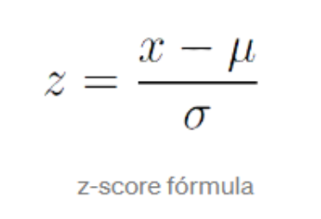

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [ ]:
scaler.transform(numeric_df)

array([[ 1.71442958,  1.37649287,  9.73533453, ...,  0.23954854,
        13.02513104,  0.22167437],
       [ 0.43564649,  0.95539286,  7.13622036, ...,  0.23954854,
         9.71535012, -2.22540268],
       [ 2.67057382,  2.20985861,  4.03046978, ...,  2.76811642,
         1.11389676,  1.37899787],
       ...,
       [-0.6561573 , -0.66842934,  0.29836392, ...,  1.0824045 ,
         0.28534679,  0.07261059],
       [ 1.99515721,  2.20985861,  3.94024686, ...,  2.76811642,
         1.08517369,  1.37899787],
       [ 0.06421403, -0.10471904,  0.03116526, ...,  1.0824045 ,
         0.11521787, -0.08732908]])

In [ ]:
scaler.fit_transform(numeric_df)

array([[ 1.71442958,  1.37649287,  9.73533453, ...,  0.23954854,
        13.02513104,  0.22167437],
       [ 0.43564649,  0.95539286,  7.13622036, ...,  0.23954854,
         9.71535012, -2.22540268],
       [ 2.67057382,  2.20985861,  4.03046978, ...,  2.76811642,
         1.11389676,  1.37899787],
       ...,
       [-0.6561573 , -0.66842934,  0.29836392, ...,  1.0824045 ,
         0.28534679,  0.07261059],
       [ 1.99515721,  2.20985861,  3.94024686, ...,  2.76811642,
         1.08517369,  1.37899787],
       [ 0.06421403, -0.10471904,  0.03116526, ...,  1.0824045 ,
         0.11521787, -0.08732908]])

In [ ]:
scaled_data = scaler.transform(numeric_df)

A seguir, podemos analisar os valores das vari√°veis num√©ricas antes da padroniza√ß√£o:

In [ ]:
numeric_df.head(3)

Salario M√™s  Media_Salarial  Tempo_de_Trabalho  Idade  Faixa_Etaria  \
0     7558.215            6605               6092     42             6   
1     4406.965            5604               4594     41             5   
2     9914.400            8586               2804     30             3   

   Estagna√ß√£o  Reconhecimento_Numerico  Reconhecimento_Medio  Feedback  
0         463                      1.0                  6092     8.757  
1         332                      1.0                  4594     8.332  
2         340                      4.0                   701     8.958

In [ ]:
scaled_data

array([[ 1.71442958,  1.37649287,  9.73533453, ...,  0.23954854,
        13.02513104,  0.22167437],
       [ 0.43564649,  0.95539286,  7.13622036, ...,  0.23954854,
         9.71535012, -2.22540268],
       [ 2.67057382,  2.20985861,  4.03046978, ...,  2.76811642,
         1.11389676,  1.37899787],
       ...,
       [-0.6561573 , -0.66842934,  0.29836392, ...,  1.0824045 ,
         0.28534679,  0.07261059],
       [ 1.99515721,  2.20985861,  3.94024686, ...,  2.76811642,
         1.08517369,  1.37899787],
       [ 0.06421403, -0.10471904,  0.03116526, ...,  1.0824045 ,
         0.11521787, -0.08732908]])

Agora, ap√≥s a aplica√ß√£o da padroniza√ß√£o, podemos analisar os valores das vari√°veis num√©ricas padronizadas.

In [ ]:
#os scalers do Scikit-learn retornam listas numpy como resposta
#se quisermos acessar esses dados em forma de Dataframe, precisamos fazer a convers√£o:
numeric_df_scaled = pd.DataFrame(scaled_data, columns = numeric_df.columns)
numeric_df_scaled.head(3)

Salario M√™s  Media_Salarial  Tempo_de_Trabalho     Idade  Faixa_Etaria  \
0     1.714430        1.376493           9.735335  1.424789      1.704571   
1     0.435646        0.955393           7.136220  1.300519      1.183212   
2     2.670574        2.209859           4.030470 -0.066452      0.140493   

   Estagna√ß√£o  Reconhecimento_Numerico  Reconhecimento_Medio  Feedback  
0    1.204905                 0.239549             13.025131  0.221674  
1    0.535412                 0.239549              9.715350 -2.225403  
2    0.576297                 2.768116              1.113897  1.378998

####3.4.1.2 - Normaliza√ß√£o

A normaliza√ß√£o √© uma t√©cnica de Min e Max, onde trata os dados deixando-os entre uma faixa de 0 a 1 ou de -1 a 1 (se tiverem valores negativos). 

Ela √© recomendada para quando temos dados em uma distribui√ß√£o n√£o Gaussiana (conhecida tamb√©m como distribui√ß√£o normal), ou um desvio padr√£o muito pequeno. √â recomend√°vel tamb√©m quando os limites de valores de atributos distintos s√£o muito diferentes.


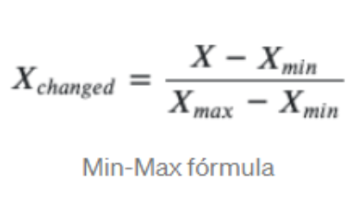

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(numeric_df)

In [ ]:
#print(scaler.numeric_df_max_)

In [ ]:
# scaler.transform(numeric_df)

In [ ]:
# scaler.fit_transform(numeric_df)

In [ ]:
# scaled_data = scaler.transform(numeric_df)

A seguir, podemos analisar os valores das vari√°veis num√©ricas antes da normaliza√ß√£o:

In [ ]:
# numeric_df.head(3)

In [ ]:
scaled_data

array([[ 1.71442958,  1.37649287,  9.73533453, ...,  0.23954854,
        13.02513104,  0.22167437],
       [ 0.43564649,  0.95539286,  7.13622036, ...,  0.23954854,
         9.71535012, -2.22540268],
       [ 2.67057382,  2.20985861,  4.03046978, ...,  2.76811642,
         1.11389676,  1.37899787],
       ...,
       [-0.6561573 , -0.66842934,  0.29836392, ...,  1.0824045 ,
         0.28534679,  0.07261059],
       [ 1.99515721,  2.20985861,  3.94024686, ...,  2.76811642,
         1.08517369,  1.37899787],
       [ 0.06421403, -0.10471904,  0.03116526, ...,  1.0824045 ,
         0.11521787, -0.08732908]])

Agora, ap√≥s a aplica√ß√£o da normaliza√ß√£o, podemos analisar os valores das vari√°veis num√©ricas normalizadas:

In [ ]:
#os scalers do Scikit-learn retornam listas numpy como resposta
#se quisermos acessar esses dados em forma de Dataframe, precisamos fazer a convers√£o:
# numeric_df_scaled = pd.DataFrame(scaled_data, columns = numeric_df.columns)
# numeric_df_scaled.head(3)

####3.4.2.3 - Compara√ß√£o entre resultados dos dois m√©todos

A partir de testagens dos modelos, substituindo apenas a padroniza√ß√£o pela normaliza√ß√£o, sem mexer nos hiperparametros e features da √©poca, atrav√©s da avalia√ß√£o de suas performances por meio dos crit√©rios de acur√°cia e matriz de confus√£o, a aplica√ß√£o da Padroniza√ß√£o apresentou melhores resultados. Por isso, as c√©dulas de normaliza√ß√£o est√£o comentadas.

Taxas de acur√°cia dos modelos com Padroniza√ß√£o:

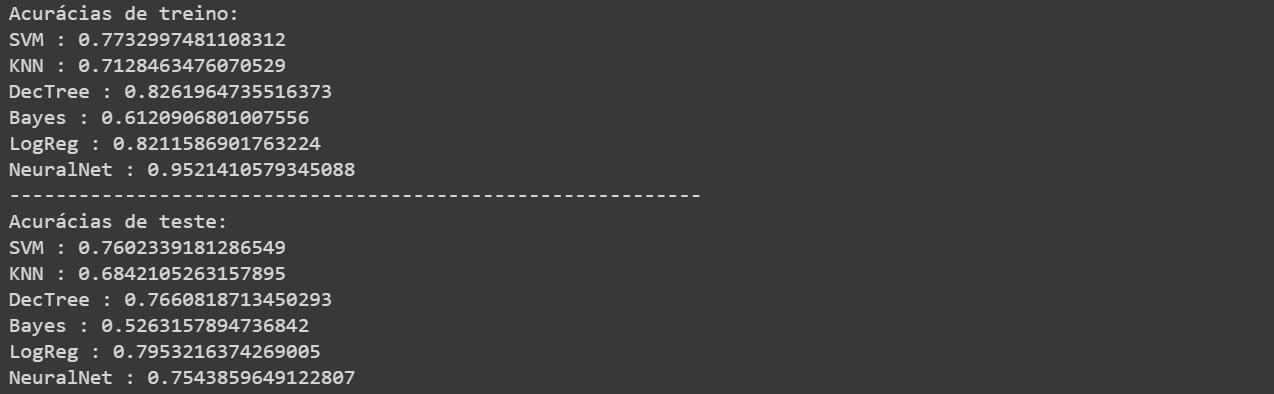

Taxas de acur√°cia com Normaliza√ß√£o:

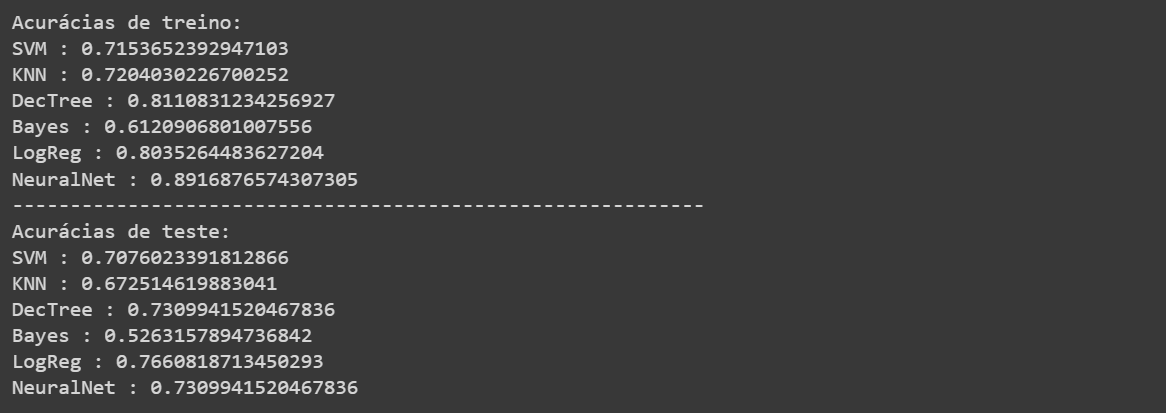

##3.5 - Cria√ß√£o da tabela final - df

Nesta se√ß√£o, criaremos a o dataframe "df", que ser√° o dataframe final utilizado para os modelos, e que cont√©m os dados da:
- 'numeric_df_scaled': cont√©m as variaveis numericas da df1 tratadas e normalizadas;
- 'cat_df': cont√©m as variaveis categoricas da df1 tratadas e com one hot encoding aplicado;
- 'Status': feature da df1, que ser√° o target do nosso modelo.

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario M√™s', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico', 'Status',
       'Media_Salarial', 'Salario_Comparado', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagna√ß√£o', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'estadoSP'],
      dtype='object')

In [ ]:
df = pd.DataFrame()
df = pd.concat([df1['Status'], numeric_df_scaled, cat_df], axis = 1)
df.columns

Index(['Status', 'Salario M√™s', 'Media_Salarial', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagna√ß√£o', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'Arquiteto', 'ArquitetoSr',
       'AssistenteI', 'AssistenteII', 'AuxiliardeLimpeza', 'ComercialIS',
       'ComercialPl', 'Consultor', 'DevEspecialista', 'DevJr', 'DevPl',
       'DevSr', 'Diretor', 'Educa√ß√£oPl', 'Estagiaria', 'FinanceiroJr',
       'FuncionalEspecialista', 'FuncionalJr', 'FuncionalPl', 'FuncionalSr',
       'Gerente', 'GerenteCSSr', 'GerentePV', 'GerenteSr', 'GerenteVendasI',
       'GerenteVendasII', 'GerenteVendasIII', 'InfraestruturaJr',
       'MarketingPL', 'PessoasPl', 'ScrumMasterJr', 'TesteJr', 'TesteSr',
       'Trainee-Dev', 'Trainee-Funcional', 'VicePresidente', 'AMS&PS',
       'Analytics&Integration', 'CPG&Retail', 'CPG&RetailII', 'Commerce',
       'Core&Industrias', 'Everymind', 'MktCloud', 'PS', 'People&Culture',
       'Vendas', 'BA', 'CE', 'DF', 'GO', 'MA', 'M

In [ ]:
df.head(5)

Status  Salario M√™s  Media_Salarial  Tempo_de_Trabalho     Idade  \
0       1     1.714430        1.376493           9.735335  1.424789   
1       0     0.435646        0.955393           7.136220  1.300519   
2       1     2.670574        2.209859           4.030470 -0.066452   
3       1     2.670574        2.442074           3.922896  0.430628   
4       0     0.538544        0.516204           3.629672 -0.190722   

   Faixa_Etaria  Estagna√ß√£o  Reconhecimento_Numerico  Reconhecimento_Medio  \
0      1.704571    1.204905                 0.239549             13.025131   
1      1.183212    0.535412                 0.239549              9.715350   
2      0.140493    0.576297                 2.768116              1.113897   
3      0.661852    0.576297                 2.768116              1.078545   
4     -0.380867    0.489416                 1.082404              2.406435   

   Feedback  ...  Solteiro  Feminino  Masculino  centro  nordeste  norte  \
0  0.221674  ...         0         1          0       0         0      0   
1 -2.225403  ...         1         0          1       0         0      0   
2  1.378998  ...         1         0          1       0         0      0   
3  0.221674  ...         1         0          1       0         0      0   
4  0.716848  ...         1         0          1       0         0      0   

   sudeste  sul  Salario_Comparado  estadoSP  
0        1    0                  0         1  
1        1    0                  1         1  
2        1    0                  0         1  
3        1    0                  0         1  
4        1    0                  0         1  

[5 rows x 85 columns]

# 4.0 - An√°lise de Features
Nesta se√ß√£o, vamos fazer uma nova an√°lise de dados. Contudo, dessa vez, ela ser√° direcionada para as features que criamos ao longo do tratamento de dados (desda 3.2 - Categoriza√ß√£o, at√© a 3.3 - Deriva√ß√£o). Isso permite que fa√ßamos uma boa escolha de vari√°veis para o modelo analisar quando for testado posteriormente na se√ß√£o 5.

## 4.1 - An√°lise Estat√≠stica de Features
Primeiro, uma an√°lise estat√≠stica das features criadas com o apoio de gr√°ficos. Isso √© importante para aprimora nosso poder de decis√£o de feature na pr√≥xima se√ß√£o (4.2 - Escolha das Features).

### 4.1.1 - Sa√≠da por estado 

In [ ]:
Estado_total = df1.groupby(['estadoSP']).count()

In [ ]:
total_foraSP = Estado_total.iloc[0, 1]
total_foraSP

118

In [ ]:
total_emSP = Estado_total.iloc[1, 1]
total_emSP

357

In [ ]:
total_foraSP_off = Estado_total.iloc[0, 4]
total_foraSP_off

35

In [ ]:
total_emSP_off = Estado_total.iloc[1, 4]
total_emSP_off

156

In [ ]:
emSP_prop = (total_emSP_off/total_emSP)*100
emSP_prop

43.69747899159664

In [ ]:
foraSP_prop = (total_foraSP_off/total_foraSP)*100
foraSP_prop

29.66101694915254

Text(0.5, 1.0, 'Desligamentos x cidade (proporcionalmente)')

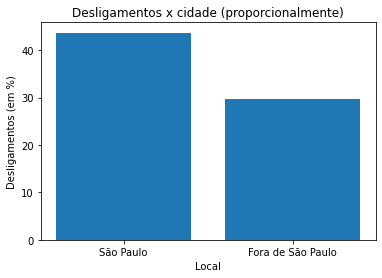

In [ ]:
est_x = ['S√£o Paulo', 'Fora de S√£o Paulo']
est_y = [emSP_prop,foraSP_prop]

plt.bar(est_x, est_y)

plt.xlabel('Local')
plt.ylabel('Desligamentos (em %)')
plt.title('Desligamentos x cidade (proporcionalmente)')

## 4.2 - Escolha das Features
Aqui finalmente escolhemos nossas features, come√ßamos com uma an√°lise macrosc√≥pica com a matriz de correla√ß√£o das features em rela√ß√£o ao Status (nosso target no modelo) e, depois, uma an√°lise individual com o apoio de gr√°ficos para as outras vari√°veis.

In [ ]:
matriz_corr = df1.corr().style.background_gradient(cmap='coolwarm')
target_corr = matriz_corr.data.Status
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

In [ ]:
matriz_corr = df.corr().style.background_gradient(cmap='coolwarm')
target_corr = matriz_corr.data.Status
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

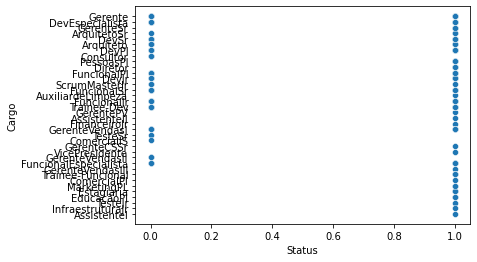

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Cargo')

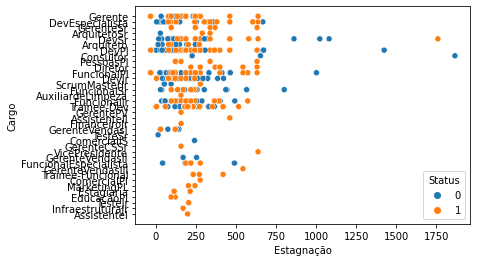

In [ ]:
sns.scatterplot(data = df1, x = 'Estagna√ß√£o', y = 'Cargo', hue = 'Status')

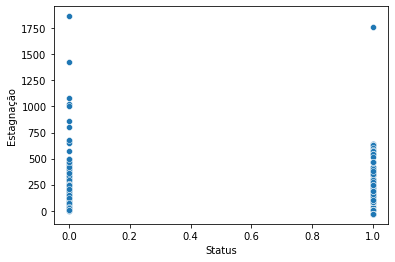

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Estagna√ß√£o')

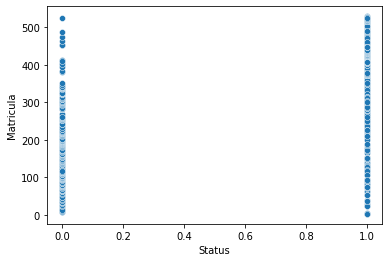

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Matricula')

In [ ]:
df1['Status'].value_counts()

1    284
0    191
Name: Status, dtype: int64

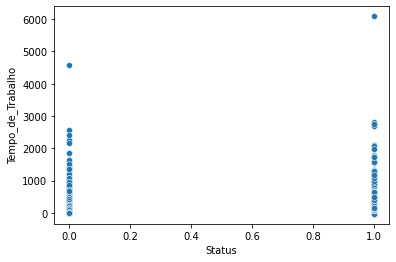

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Tempo_de_Trabalho')

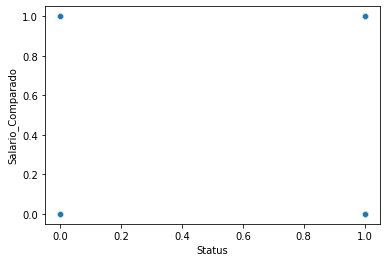

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Salario_Comparado')

#5.0 - Pr√©-modelagem

##5.1 - divis√£o/prepara√ß√£o do dataset

Nessa etapa inicial, escolhemos a features a serem utilizadas no modelo (variavel "x"), e a vari√°vel alvo ("y")

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario M√™s', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico', 'Status',
       'Media_Salarial', 'Salario_Comparado', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagna√ß√£o', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'estadoSP'],
      dtype='object')

In [ ]:
cat_df.columns

Index(['Arquiteto', 'ArquitetoSr', 'AssistenteI', 'AssistenteII',
       'AuxiliardeLimpeza', 'ComercialIS', 'ComercialPl', 'Consultor',
       'DevEspecialista', 'DevJr', 'DevPl', 'DevSr', 'Diretor', 'Educa√ß√£oPl',
       'Estagiaria', 'FinanceiroJr', 'FuncionalEspecialista', 'FuncionalJr',
       'FuncionalPl', 'FuncionalSr', 'Gerente', 'GerenteCSSr', 'GerentePV',
       'GerenteSr', 'GerenteVendasI', 'GerenteVendasII', 'GerenteVendasIII',
       'InfraestruturaJr', 'MarketingPL', 'PessoasPl', 'ScrumMasterJr',
       'TesteJr', 'TesteSr', 'Trainee-Dev', 'Trainee-Funcional',
       'VicePresidente', 'AMS&PS', 'Analytics&Integration', 'CPG&Retail',
       'CPG&RetailII', 'Commerce', 'Core&Industrias', 'Everymind', 'MktCloud',
       'PS', 'People&Culture', 'Vendas', 'BA', 'CE', 'DF', 'GO', 'MA', 'MG',
       'MS', 'PA', 'PB', 'PE', 'PR', 'RJ', 'RN', 'RS', 'SC', 'SE', 'SP',
       'Casado', 'Solteiro', 'Feminino', 'Masculino', 'centro', 'nordeste',
       'norte', 'sudeste', 'sul', 'Sa

In [ ]:
numeric_df.columns

Index(['Salario M√™s', 'Media_Salarial', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagna√ß√£o', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback'],
      dtype='object')

In [ ]:
df.columns

Index(['Status', 'Salario M√™s', 'Media_Salarial', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagna√ß√£o', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'Arquiteto', 'ArquitetoSr',
       'AssistenteI', 'AssistenteII', 'AuxiliardeLimpeza', 'ComercialIS',
       'ComercialPl', 'Consultor', 'DevEspecialista', 'DevJr', 'DevPl',
       'DevSr', 'Diretor', 'Educa√ß√£oPl', 'Estagiaria', 'FinanceiroJr',
       'FuncionalEspecialista', 'FuncionalJr', 'FuncionalPl', 'FuncionalSr',
       'Gerente', 'GerenteCSSr', 'GerentePV', 'GerenteSr', 'GerenteVendasI',
       'GerenteVendasII', 'GerenteVendasIII', 'InfraestruturaJr',
       'MarketingPL', 'PessoasPl', 'ScrumMasterJr', 'TesteJr', 'TesteSr',
       'Trainee-Dev', 'Trainee-Funcional', 'VicePresidente', 'AMS&PS',
       'Analytics&Integration', 'CPG&Retail', 'CPG&RetailII', 'Commerce',
       'Core&Industrias', 'Everymind', 'MktCloud', 'PS', 'People&Culture',
       'Vendas', 'BA', 'CE', 'DF', 'GO', 'MA', 'M

In [ ]:
x = df.drop(['Status'], axis = 1)
y = df['Status']

###5.1.2 - Oversampling e Undersampling

Ainda com o intuito de preparar os dados e equilibr√°-los para o modelo, aplicamos as t√©cnicas de Oversampling e Undersampling, que fazem com que a quantidade de colaboradores que sa√≠ram da empresa seja a mesma de colaboradores que n√£o sa√≠ram. Essas t√©cnicas s√£o importantissimas para o balanceamento e para evitar vi√©ses nos modelos, e, especialmente no contexto de uma base de dados muito pequena como a utilizada, o Oversampling se mostra essencial para aument√°-la.

 Nesse sentido, dentre as t√©cnicas mais comuns de oversampling e undersampling - comentadas nas c√©dulas abaixo - a que mais se encaixa no contexto do nosso modelo, e que apresentou melhor desempenho foi o 'SMOTE'.

In [ ]:
# #UNDERSAMPLING - n√£o vamos usar

# # Random Undersampler <-
# rus = RandomUnderSampler(random_state = 32)
# X_rus_res, y_rus_res = rus.fit_resample(x, y)

# # NearMiss
# nm = NearMiss(version=1)
# X_nm_res, y_nm_res = nm.fit_resample(x, y)

# # OneSidedSelection (Algoritmo tipo KNN)
# oss = OneSidedSelection(random_state = 32)
# X_oss_res, y_oss_res = oss.fit_resample(x, y)

O SMOTE √© uma tecnica de oversampling que se mostra mais precisa e adequada que o 'Random Oversampler', visto que ajuda a resolver o problema de overfitting muitas vezes gerado pelo Random.

In [ ]:
#OVERSAMPLING

# Random Oversampler
# ros = RandomOverSampler(random_state = 32)
# X_ros_res, y_ros_res = ros.fit_resample(x, y)

# SMOTE -> melhor resultados
smote = SMOTE(random_state = 32)
x_smote_res, y_smote_res = smote.fit_resample(x, y)

###5.1.3 - divis√£o dos conjuntos de teste e treino

In [ ]:
#divis√£o dos dados de teste e de treino
x_train, x_test, y_train, y_test = train_test_split(x_smote_res,
                                                            y_smote_res,
                                                            test_size=0.3,
                                                            random_state=32)


# 6.0 - Modelagem

Realizamos experimentos que englobam 6 tipos de modelos que consideramos v√°lidos e com potencial para o nosso projeto de predi√ß√£o de classifica√ß√£o: 
- SVM (Support-Vector Machine)
- KNN (K-Nearest Neighbors)
- √Årvore de Decis√£o
- Naive Bayes
- Regress√£o Log√≠stica
- Redes Neurais

Diante disso, ap√≥s as testagens dos modelos, o modelo de √Årvore de Decis√£o apresentou a melhor performance entre os modelos (a partir das m√©tricas de avalia√ß√£o utilizadas), e foi escolhido como modelo final do projeto.

## √Årvore de decis√£o - Modelo Final

A √°rvore de decis√£o √© uma das t√©cnicas mais populares de minera√ß√£o, principalmente para a tarefa de classifica√ß√£o, e consiste em uma cole√ß√£o de n√≥s internos e n√≥s folhas, organizados em um modelo hier√°rquico. 

Nesse sentido, assim como apresentado na imagem a baixo, os n√≥s internos representam os atributos descritivos do modelo, as sub√°rvores saem de cada n√≥ interno, e cont√©m os poss√≠veis valores do seu n√≥ raiz, e os n√≥s folha representam uma decis√£o sugerida pelo modelo (r√≥tulos).
Basicamente, uma √°rvore de decis√£o se ramifica em diversas escolhas que podem ser tomadas, que levam a outras escolhas, at√© chegar em um r√≥tulo.


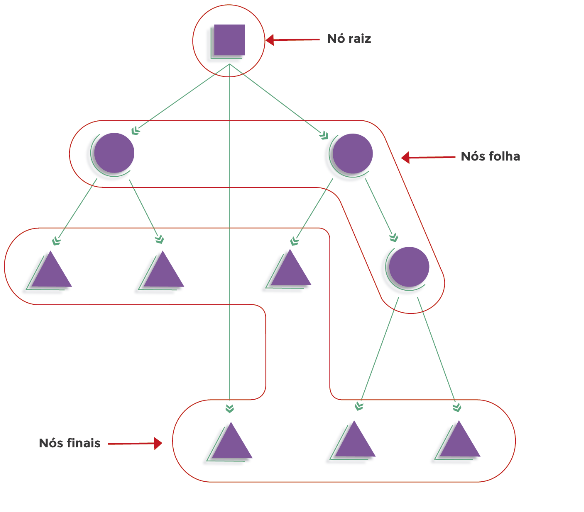

###6.1 - Algoritmo

Nessa etapa, aplicamos o algoritmo de √Årvore de Decis√£o, atrav√©s da fun√ß√£o DecisionTreeClassifier, em que definimos hiperparametros- a partir de an√°lises feitas com o Random Search, Grid Search e testagens, que ser√£o apresentados nos t√≥picos 6.3.4, 6.3.5 e 6.3.6 deste Notebook.

Hiperpar√¢metros definidos fora do default:
- **Min_samples_split**: o menor n√∫mero de amostras para dividir um n√≥ interno; 
- **Min_samples_leaf**: o menor n√∫mero de amostras para estar em uma folha; 
- **max_depth**: A profundidade da √°rvore; se mostrou essencial a defini√ß√£o de um valor baixo, visto que valores altos levavam ao overfitting;
- **criterion**: mede a qualidade de uma subdivis√£o da √°rvore


In [ ]:
arv = DecisionTreeClassifier(random_state=32,
                             criterion = 'gini',
                             max_depth = 7,
                             min_samples_leaf = 1,
                             min_samples_split = 3,
                             )
arv.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=32)

In [ ]:
(y_train).value_counts()
(y_test).value_counts()

1    90
0    81
Name: Status, dtype: int64

In [ ]:
p = arv.predict(x_test)
p_1 = arv.predict(x_train)

### 6.2 - Avalia√ß√£o das predi√ß√µes

#### 6.2.1 - Acur√°cia

In [ ]:
print('Acur√°cia (treino): ', arv.score( x_train, y_train))
print('Acur√°cia (teste): ', arv.score( x_test, y_test))

Acur√°cia (treino):  0.8992443324937027
Acur√°cia (teste):  0.8538011695906432


#### 6.2.2 - Matriz de Confus√£o

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



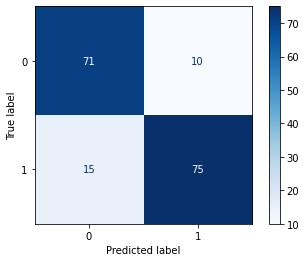

In [ ]:
plot_confusion_matrix(arv, x_test, y_test, cmap='Blues', values_format='.0f',)

#### 6.2.3 - Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



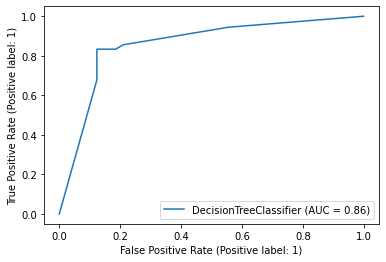

In [ ]:
plot_roc_curve(arv ,x_test, y_test)

### 6.3 - Visualiza√ß√£o da √Årvore criada

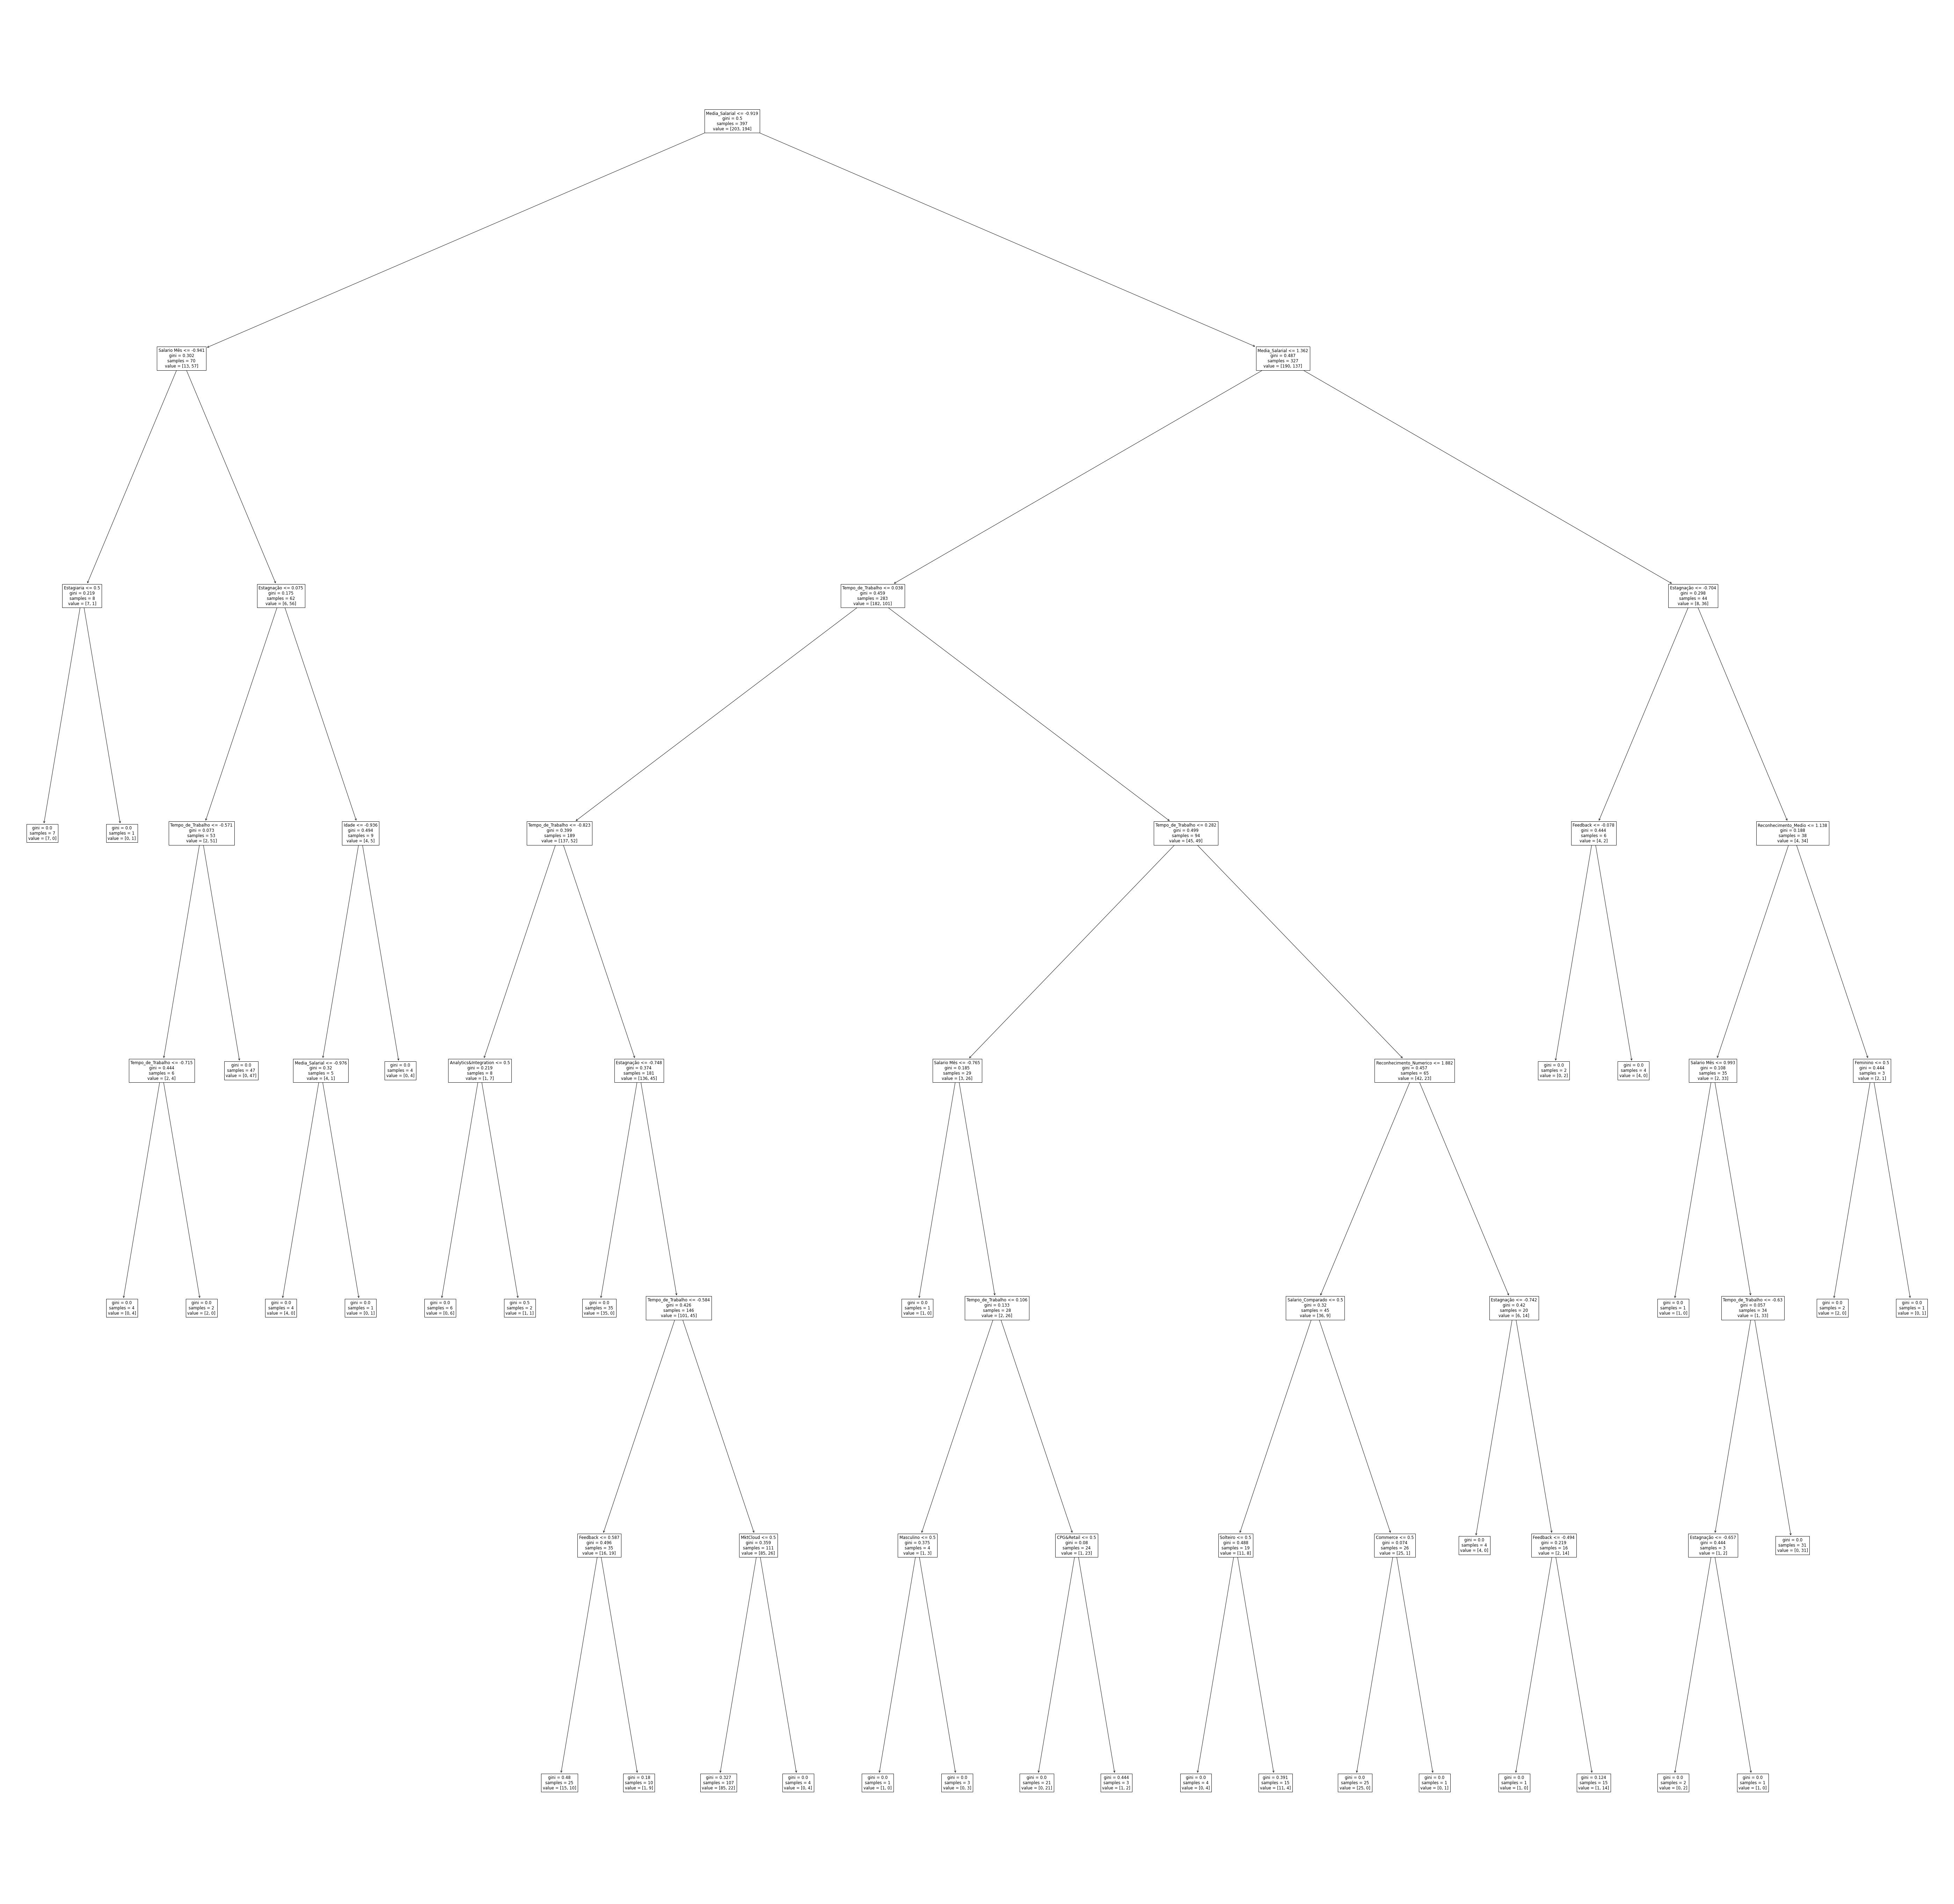

In [ ]:
 fig, ax = plt.subplots(figsize=(100, 100))
 _ = plot_tree(arv, feature_names = x.columns)